In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glassdoor-job-reviews-2/all_reviews.csv


In [2]:
df=pd.read_csv("/kaggle/input/glassdoor-job-reviews-2/all_reviews.csv")

/tmp/ipykernel_35/718910997.py:1: DtypeWarning: Columns (5,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/glassdoor-job-reviews-2/all_reviews.csv")


In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,rating,title,status,pros,cons,advice,Recommend,CEO Approval,Business Outlook,Career Opportunities,Compensation and Benefits,Senior Management,Work/Life Balance,Culture & Values,Diversity & Inclusion,firm_link,date,job,index
0,5.0,Good,"Current Employee, more than 10 years",Knowledge gain of complete project,Financial growth and personal growth,NaN,v,o,v,3,3,3,3,3.0,3.0,Reviews/Baja-Steel-and-Fence-Reviews-E5462645.htm,"Nov 19, 2022",Manager Design,NaN
1,4.0,Good,"Former Employee, less than 1 year","Good work,good work , flexible, support","Good,work, flexible,good support, good team work",NaN,v,o,o,4,4,4,4,4.0,4.0,Reviews/Baja-Steel-and-Fence-Reviews-E5462645.htm,"Jan 29, 2022",Anonymous Employee,NaN
2,4.0,"Supervising the manufacturing the processes, e...","Current Employee, more than 1 year",This company is a best opportunity for me to l...,"Monthly Target work,Maintain production schedu...",NaN,v,o,v,2,3,2,2,2.0,2.0,Reviews/Baja-Steel-and-Fence-Reviews-E5462645.htm,"Aug 12, 2021",Production Engineer,NaN
3,1.0,terrible,"Current Employee, more than 1 year",I wish there were some to list,too many to list here,NaN,x,x,x,1.0,3.0,1.0,3.0,1.0,NaN,https://www.glassdoor.com/Reviews/Calgary-Flam...,"Sep 24, 2020",Senior Account Executive,NaN
4,4.0,"It could be so good, but it isn’t","Current Employee, more than 3 years",Fast Paced. Endless challenges. Inclusive envi...,The biggest perk of the job provides no value ...,NaN,o,o,o,3.0,3.0,3.0,1.0,4.0,5.0,https://www.glassdoor.com/Reviews/Calgary-Flam...,"Mar 25, 2023",Assistant Manager,NaN


# Filtering Companies common across all years 

In [6]:
import pandas as pd

# Extract 'company' from 'firm_link'
def extract_company(firm_link):
    if pd.isna(firm_link):
        return None
    if '/' in firm_link:
        return firm_link.split('/')[-1].split('.')[0]
    return firm_link.split('.')[0]

df['company'] = df['firm_link'].apply(extract_company)

# Extract year from 'date'
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

# Drop rows with missing year or company
df = df.dropna(subset=['year', 'company'])

# Get list of years in the dataset
years = sorted(df['year'].unique())

# Build dictionary of sets of companies by year
companies_by_year = {
    year: set(df[df['year'] == year]['company']) for year in years
}

# Find companies common across all years
common_companies = set.intersection(*companies_by_year.values())

# Filter df to only those companies
df_common = df[df['company'].isin(common_companies)].copy()

# Optional: reset index
df_common.reset_index(drop=True, inplace=True)

print(f"✅ Filtered dataframe created with {len(df_common)} rows and {len(common_companies)} companies present in all years.")


✅ Filtered dataframe created with 6139983 rows and 2440 companies present in all years.


# Defining The Keyword Dictionary

In [4]:

topic_dict = {
  ############################# CORPORATE CULTURE ########################################################
    "innovation": [
        "creativity", "innovative", "innovate", "innovation", "creative", "excellence", "passion", "world-class", "technology", "operational_excellence", "passionate", "product_innovation", "capability", "customer_experience", "thought_leadership", "expertise", "agility", "efficient", "technology_innovation", "competency", "know-how", "cutting-edge", "agile", "creatively", "customer-centric", "enable",
        "value_proposition", "reinvent", "focus", "innovation_capability", "efficiency", "customer_value", "customer_intimacy", "competence", "user_experience", "create", "storytelling", "pride", "core_competency", "ingenuity", "technology_platform", "consumer_experience", "product_technology", "engineering_team", "differentiate", "powerful", "inspiring", "innovation_process", "transform", "product_team",
        "inspiration", "innovation_team", "technology_team", "best-in-class", "r&d_team",
        "loyalty", "truly", "technological", "differentiation", "technology_capability",
        "intellect", "focused", "design_capability", "product_development",
        "solve_customer_problem", "customer_focus", "inspire", "branding", "cut_edge",
        "business_process", "brand", "personalization", "distinctive", "cost-effective",
        "automation", "world_class", "harness", "efficiently", "domain_expertise",
        "product_development_capability", "cost-efficient", "core_capability",
        "consumer_insight", "platform", "engaging", "delight", "mass_customization",
        "uniqueness", "product_leadership", "customer_success", "specialization",
        "innovation_engine", "invent", "guest_experience", "innovator", "tool",
        "design_team", "craftsmanship", "seamlessness", "intellectual_property",
        "solve_problem", "incredible", "go-to-market", "service_experience", "enhance",
        "technology_standpoint", "sophistication", "excitement", "innovatively", "great",
        "business_model", "world-leading", "innovation_lab", "fanatical_support",
        "brand_management", "service_model", "go-to-market_capability", "customer_insight",
        "authentic", "discipline", "nimble", "effectiveness", "customer-oriented",
        "design_thinking", "execution", "mobile-first", "knowhow", "product_idea",
        "relentless", "r&d_capability", "importantly", "product_development_team",
        "customer-focused", "product_design", "showcase", "innovation_standpoint",
        "core_competence", "ai_technology", "excel", "develop", "effort", "responsiveness",
        "process_excellence", "building_capability", "technology_solution",
        "product_capability", "execution_capability", "critically_important", "solution",
        "heritage", "simplicity", "cohesive", "scalability", "intelligent", "curation",
        "process_improvement", "intimacy", "user_interface", "r&d_organization",
        "best-in-breed", "core_technology", "analytic", "domain_knowledge", "creativeness",
        "client_experience", "technology_perspective", "invention", "cost_efficiency",
        "technologically", "core_strength", "award-winning", "learn", "merchandising",
        "marketing_team", "ethos", "optimize", "awareness", "technology_leadership",
        "game_team", "leadership_position", "engineering_capability",
        "leverage_technology", "feature_functionality", "brand_equity", "smarter",
        "enabler", "dna", "operating_platform", "computer_graphic", "service_excellence",
        "marketing_idea", "service_delivery_platform", "artistic",
        "product_development_process", "ability", "reimagine", "platform_capability",
        "democratize", "end-to-end", "forefront", "connectedness", "customer_interface",
        "datum_analytic", "innovation_perspective", "r&d_department", "take_cost_out",
        "reengineer", "workflow", "center_excellence", "marketing_technology", "relevancy",
        "unparalleled", "content", "successful", "smart", "technology_architecture",
        "process_innovation", "authenticity", "scalable", "vision", "marketer",
        "visual_merchandising", "brand_experience", "productivity", "technology-enabled",
        "terrific", "easy-to-use", "product_experience", "coherence", "product_management",
        "machine_learning_ai", "leadership_product", "industry_leadership", "simplify",
        "science", "versatility", "artificial_intelligence", "packaging_solution",
        "intellectual", "datum_science", "best-of-breed", "attract", "adaptability",
        "r&d_group", "drive_innovation", "delivery_platform", "succeed", "modern",
        "state-of-the-art", "immersive", "information_technology", "engineering_skill",
        "r&d_community", "transformation", "ease-of-use", "design",
        "category_management", "technology_base", "business_system", "unique",
        "application_expertise", "video_technology", "product_creation",
        "breakthrough_technology", "teaching", "innovation_technology", "delivery_system",
        "breadth_depth", "architecture", "marketing_capability", "visual",
        "world_class_product", "technology-driven", "internally_externally",
        "delivery_model", "consumer_engagement", "success", "rapid_prototyping",
        "customer_centricity", "information-based", "problem_solver",
        "delivery_organization", "video_experience", "globalize", "product_excellence",
        "problem-solving", "machine_learning", "product_offering", "marketing_expertise",
        "social_media", "customer_loyalty", "design_expertise", "personalized",
        "unique_selling_proposition", "marketing_skill", "enablement", "product_developer",
        "service_leader", "engineering_organization", "usability",
        "technology_development", "manufacturing_engineering", "innovativeness",
        "leadership_model", "technology_organization", "entertainment_experience",
        "imaginative", "product_differentiation", "resourceful", "search_capability",
        "consumer-centric", "creator", "brand_recognition", "shopping_experience",
        "innovation_center", "breakthrough_innovation", "knowledge-based",
        "design_standpoint", "knowledge_management", "content_creation", "secret_sauce",
        "core_business_process", "multi-channel", "software_team", "software_engineering",
        "distinctiveness", "store_environment", "imperative", "compelling", "globalization",
        "customer_relationship_management", "product_development_system",
        "core_value_proposition", "product_functionality", "operation_excellence",
        "prowess", "resonate", "fabulous", "technology-based", "process_management",
        "newness", "exciting", "clever", "restaurant_experience", "recipe",
        "marketing_tool", "supply_chain_approach", "technology_differentiation", "proven",
        "storyteller", "devops", "inventive", "architect", "product_solution",
        "deep_domain_expertise", "technology_leader", "engineering_expertise", "amazing",
        "solution_capability", "engineering_talent", "innovation_side",
        "application_knowledge", "consumer_understanding", "experiential",
        "solve_business_problem", "fantastic", "brand_name", "service_culture",
        "brand_building", "search_technology", "testament", "unifying", "organizations",
        "workspace", "foundation", "brand_identity", "inventiveness", "brand_positioning",
        "integrated", "wonderful", "fanatical", "best", "messaging", "mastery", "fun",
        "self-expression", "store_experience", "first-rate", "elegance",
        "marketing_excellence", "content_experience", "beautiful", "consulting_expertise",
        "operating_skill", "brain_power", "taste", "inspirational", "hallmark", "superb"
    ],

    "integrity": [
        "accountability", "ethic", "integrity", "responsibility", "transparency",
        "accountable", "governance", "ethical", "transparent", "trust", "responsible",
        "oversight", "independence", "objectivity", "moral", "trustworthy", "fairness",
        "hold_accountable", "corporate_governance", "autonomy", "core_value", "assure",
        "stakeholder", "fiduciary_responsibility", "continuity", "credibility", "honesty",
        "privacy", "fiduciary_duty", "rigor", "empathy", "ethic_integrity", "egalitarian",
        "fiduciary", "utmost", "code_ethic", "faith", "passionately", "impartial",
        "compliance", "honorable", "socially_responsible", "ethically", "company_culture",
        "solidarity", "democracy", "stewardship", "identity", "constituent",
        "governance_model", "citizen", "scrupulous", "society", "governance_structure",
        "safety_soundness", "humility", "decency", "meritocracy", "reassure", "exemplary",
        "business_ethic", "act_responsibly", "advocacy", "controllership", "diligent",
        "sincerity", "satisfaction", "supervision", "consistency", "value_system",
        "delegate", "advocate", "fiduciary_obligation", "philanthropy", "risk_control",
        "empathetic", "advice", "safety_culture", "risk_management", "business_conduct",
        "unbiased", "principled", "rigorous", "candid", "principle", "humble",
        "eat_cooking", "banking_supervision", "risk_oversight", "condone", "correctness",
        "science-based", "skin_game", "equality", "preach", "compassion", "adhere",
        "management_style", "consumer_protection", "religious", "credo", "citizenship",
        "governance_standpoint", "management", "executive_committee", "seriousness",
        "probity", "executive_board", "governance_process", "sincere", "management_board",
        "counsel", "rigor_discipline", "safety_environment", "assurance", "candor",
        "compliance_team", "well-informed", "elect_official", "corrupt", "mindset",
        "pragmatic", "anonymity", "onus", "business_practice", "thoughtful",
        "board_oversight", "evidence-based", "meticulous", "crime", "patient_safety",
        "committee", "risk_committee", "finance_department", "traceability",
        "mission_statement", "spirit", "paternalistic", "freedom", "governance_rule",
        "high-integrity", "quality_assurance", "policymaker", "risk_organization",
        "credible", "audit_committee", "quality_management_system", "shareholder_community",
        "policy_maker", "governance_perspective", "custodian", "governance_system",
        "faithful", "instruct", "wellintended", "supervise", "communication_style",
        "regulator", "instil", "authorship", "paramount_importance", "compliance_program",
        "convince", "unwavering_commitment", "honest", "institutionalize", "courage",
        "insist", "governance_practice", "community_member", "governance_framework",
        "nonpartisan", "proper", "honor", "secrecy", "bureaucrat", "risk_management_function",
        "abide", "frugality", "performance_culture", "safeguard", "community_standard",
        "steadfast", "level_playing_field", "conformity", "forthright", "deserve",
        "thoughtfulness", "board_director", "decentralize", "control", "moral_obligation",
        "finance_team", "instill", "sovereignty", "well-intentioned", "comply",
        "convincing", "misconduct", "zeal", "applaud", "democratic", "quality_organization",
        "fact-based", "frustration", "decision_rights", "harm", "constitutionally",
        "oversight_responsibility", "conscience", "government_regulator", "authority",
        "bureaucracy", "responsibly", "unethical", "trustworthiness", "esteem", "safety",
        "supervisory", "journalism", "council", "expert", "mantra", "audit_function",
        "genuinely", "adhering", "responsive", "govern_body", "hands-off", "decentralized",
        "diligence", "disinterested", "conflict-free", "disciplined", "confidentiality",
        "oversight_committee", "company_management", "adherence", "motivation",
        "quality_care", "governance_standard", "in-charge", "business-like", "dishonest",
        "caretaker", "compliance_department", "paramount", "employee_engagement",
        "core_principle", "judiciary", "management_discipline", "team-oriented",
        "suitability", "thoroughness", "information_flow", "management_approach",
        "compliance_function", "impeccable", "overseer", "thorough", "unequivocally",
        "nondiscrimination", "politician", "harmonized", "strict", "embarrassment",
        "board_function", "enforce", "business_principle", "steward", "operation_council",
        "compliance_aspect", "vested_interest", "governance_issue", "prescriptive",
        "attentive", "risk_manager", "subcommittee", "inculcate", "resolute", "reproach",
        "safety-first", "risk_management_group", "management_committee",
        "nominating_committee", "safety_management", "unequivocal", "management_philosophy",
        "reputable", "keen", "reputational_risk", "individualistic", "metrics-driven",
        "authoritative", "governmental_agency", "wisdom", "procurement_department",
        "demonize", "insistence", "law-abiding", "resourcefulness", "proprietor",
        "money_laundering", "ingrained", "harassment", "customer_champion",
        "brand_champion", "communicative", "franchisor", "bureaucratic", "advice_counsel",
        "stakeholder_management", "entrust", "shareholder_interest", "police", "unselfish",
        "suasion", "courteous", "vouch", "visionary", "intellectually_honest", "derelict",
        "sincerely", "corruption", "conflict", "remuneration_committee", "legitimacy",
        "prudence", "acutely_aware", "legislator", "informed", "investment_community",
        "wholeheartedly", "ombudsman", "dictatorship", "core_responsibility", "unanimously",
        "ego", "sympathetic", "journalistic", "careful", "illegality", "conscientious",
        "obsessive", "stand_up", "governing_council", "litigator", "renown", "seriously",
        "honestly", "partisan", "truth", "humbly", "reprehensible", "praise",
        "disrespect", "let_you_down", "criticism", "irresponsible", "arrogant", "candidly"
    ],

    "quality": [
        "dedicated", "quality", "dedication", "customer_service", "customer",
        "dedicate", "service_level", "mission", "service_delivery", "customer_satisfaction",
        "service", "reliability", "commitment", "customer_need", "customer_support",
        "high-quality", "ensure", "customer_relationship", "quality_service",
        "product_quality", "quality_product", "capable", "service_quality", "end_user",
        "quality_level", "customer_expectation", "service_capability", "client",
        "customer_requirement", "sla", "support", "customer_commitment", "vendor_partner",
        "service_standard", "service_team", "operation_team", "quality_standard",
        "mission-critical", "customer_care", "customer_solution", "deliver",
        "customer_engagement", "support_team", "service_level_agreement", "connectivity",
        "customer_demand", "system_engineer", "commit", "service_offering",
        "service_support", "service_organization", "channel_partner", "product",
        "service_product", "customer_base", "vendor", "service_management", "supplier",
        "network", "service_requirement", "brand_promise", "customer_team", "specialize",
        "application_solution", "serve", "customer_service_organization", "end_customer",
        "customer_support_people", "speed", "it_team", "service_people", "field",
        "delivery_people", "quality_control", "delivery_capability", "desire",
        "delivery_team", "customer_contact", "customer-facing", "account_team",
        "top-quality", "customize", "customization", "specification", "guest",
        "customer_service_level", "support_capability", "it_department", "skill_building",
        "high-touch", "help_desk", "support_organization", "end-user", "service_commitment",
        "engineering_support", "critical", "enterprise-class", "implementation_team",
        "field_technician", "service_proposition", "high-value", "it_governance",
        "service_personnel", "supply_chain", "solution_set", "application_engineer",
        "service_representative", "security_operation_center", "quality_management",
        "tailor", "professional_service_team", "product_management_team", "breadth",
        "workload", "service_provider", "infrastructure", "customer_interaction",
        "build", "sale_support", "work_flow", "specialized", "project_management",
        "customer_site", "quality_delivery", "application_support",
        "consulting_organization", "functionality", "high-performance", "friendliness",
        "brand_partner", "customer_relation", "shop_floor", "field_application_engineer",
        "service_aspect", "uptime", "classroom_experience", "on-time_delivery",
        "sale_engineering_team", "customer_training", "devotion", "program_management",
        "professional_service_organization", "quality_work", "task", "tireless",
        "deployment_team", "call_center_agent", "application_people", "specialist",
        "enduser_customer", "enterprise-grade", "solution_center", "service_engineer",
        "security_specialist", "engineering_resource", "deliver_it_out",
        "customer_service_rep", "field_service_engineer", "delivery_performance",
        "customer_service_experience", "service_need", "quality_aspect", "product_spec",
        "requirement", "field_sale_organization", "sale_management", "maintenance_team",
        "customer_request", "application_engineering", "supplier_quality",
        "end-to-end_solution", "service_automation", "sale_floor", "bandwidth",
        "productive", "locally", "sale_machine", "seamless", "it_capability",
        "selling_skill", "war_fighter", "installation_team", "relationship_management",
        "carrier_partner", "proficiency", "sale_engineer", "logistics", "product_specialist",
        "system_requirement", "back_they_up", "client_interface", "account_management",
        "quality_system", "application_integration", "customer_orientation",
        "automation_capability", "sale_force", "customer_delivery", "essential",
        "product_service", "project_team", "turnkey_solution", "product_training",
        "mission_critical_application", "custom_solution", "field_application",
        "service_element", "solution_team", "retrain", "on-site", "r&d_people",
        "sale_effort", "implementation_capability", "customer_engineer",
        "service_specialist", "customer_application", "customer_service_solution",
        "business_outcome", "assemble", "customer_service_group", "network_team",
        "devoted", "delivery", "engineering_department", "tech_support", "mission_critical",
        "management_support", "business_team", "quality_expectation", "business_need",
        "manpower", "client_service_team", "work_type", "support_structure",
        "aftermarket_support", "system_engineering", "it_infrastructure",
        "manufacturing_team", "quality_support", "it_solution", "manufacturing_capability",
        "certification_program", "mobility_solution", "deliverable", "architecture_team",
        "fulfillment", "process_capability", "customer_spec", "supply_chain_logistics",
        "partner_enablement", "it_operation", "project_management_skill",
        "integration_service", "market_requirement", "support_infrastructure",
        "market-facing", "manufacturing_organization", "market_need",
        "meeting_customer", "service_reliability", "system_support", "technology_requirement",
        "guest_need", "supply_chain_requirement", "client_requirement",
        "engineering_requirement", "client_need", "reliability_requirement",
        "guest_expectation"
    ],
    
    "respect": [
        "talented", "talent", "empower", "team_member", "employee", "team",
        "leadership", "leadership_team", "culture", "teammate", "organization",
        "entrepreneurial", "skill", "executive", "empowerment", "management_team",
        "best_brightest", "professionalism", "staff", "highly_skilled", "skill_set",
        "technologist", "competent", "entrepreneur", "experienced", "energize",
        "entrepreneurial_spirit", "high-caliber", "manager", "leadership_skill",
        "management_group", "motivated", "executive_team", "senior_executive",
        "deep_bench", "employee_base", "leader", "business_acumen", "career_path",
        "sale_professional", "motivate", "management_people",
        "human_resource_department", "dignity", "entrepreneurship", "quality_people",
        "senior-level", "talent_pool", "scientist", "work_ethic", "it_professional",
        "leadership_talent", "well-trained", "technology_people", "athlete", "veteran",
        "workforce", "highly_motivate", "field_organization", "it_people", "talent_base",
        "personality", "recruit", "knowledgeable", "hard-working", "top-notch",
        "business_leader", "leadership_level", "co-worker", "stylist", "management_skill",
        "mentor", "management_talent", "store_manager", "ambassador", "reputation",
        "culturally", "faculty", "professionally", "branch_staff", "leadership_group",
        "bench_strength", "designer", "career_opportunity", "organisation",
        "sale_executive", "subject_matter_expert", "skillset", "subject_matter_expertise",
        "people", "relationship_manager", "frontline_employee", "top-flight",
        "team_approach", "proud", "domain_expert", "investment_professional",
        "senior_leadership_team", "salespeople", "sale_leader", "caliber",
        "project_manager", "sale_team", "mentorship", "founder", "business_people",
        "respectful", "sale_organization", "operating_team", "development_team",
        "work_force", "industry_expertise", "re-skill", "sale_people", "energetic",
        "business_professional", "credentials", "relationship_management_team",
        "workplace", "core_team", "coach", "datum_scientist", "team_player",
        "work_environment", "nurture", "senior_officer", "hardworking", "trainer",
        "company_employee", "caring", "team_leader", "folk", "account_management_team",
        "practice_leader", "coaching", "camaraderie", "morale", "software_developer",
        "staff_member", "consultant", "skilled", "sale_associate", "trained",
        "coworker", "admire", "brand_ambassador", "cultural", "fellow", "railroader",
        "executive_talent", "training", "servant", "officer", "field_people",
        "highly-skilled", "training_program", "health_enthusiast", "seasoned_experienced",
        "mentoring", "store_team", "store_manager_district_manager", "client_service",
        "field_team", "train_they_up", "leadership_development", "editorial_team",
        "department_head", "finance_organization", "marketing_manager", "well-skilled",
        "cast_member", "executive_level", "field_leader", "sale_management_team",
        "management_staff", "client-facing", "well-educated", "member", "director-level",
        "hire", "managing_director", "relationship_banker", "adviser", "crew_member",
        "educate", "sale_folk", "assistant", "teacher", "c_suite", "leadership_standpoint",
        "branch_manager", "cultural_fit", "respected", "train", "banker", "grateful",
        "well-experienced", "advisor", "product_manager", "program_manager",
        "district_manager", "accomplished", "selling_organization", "sale_skill",
        "compliance_officer", "recruiting_organization", "investment_team",
        "long-tenured", "technician", "talent_people", "leadership_capability",
        "highly-talented", "decision_maker", "skill_level", "person", "cadre", "army",
        "operation_staff", "district_sale_manager", "labor_leader", "communication_skill",
        "leadership_role", "caregiver", "senior", "field_sale_people", "marketing_person",
        "proven_track_record", "project_leader", "management_organization",
        "people_development", "appreciative", "salesforce", "insurance_professional",
        "field_leadership", "cio", "business_experience", "business_development_people",
        "recruiting_team", "recruiting", "service_professional", "aptitude", "profession",
        "privilege", "product_knowledge", "field_leadership_team", "thankful", "champion",
        "account_manager", "engineer", "full-time", "engineering_people",
        "general_managers", "platform_president", "knowledge_base", "businesspeople",
        "seasoned_executive", "c-level", "vp_level", "interior_designer",
        "customer_service_team", "resource", "leadership_quality", "bring_people_in",
        "investment_talent", "teach", "store_employee", "technology_folk", "accenture",
        "plant_manager", "vice_presidents", "board_member", "product_people",
        "service_mentality", "sale_manager", "tribute", "team_building", "management_member",
        "hands-on", "marketing_people", "work_experience", "field_manager", "acumen",
        "account_executive", "datum_analyst", "mid-career", "lieutenant",
        "front_line_employee", "director", "supervisor", "spokespeople", "charismatic",
        "knowledge_worker", "marketing_staff", "well-respected", "staff_people",
        "field-based", "credential", "young", "filmmaker", "train_up", "country_manager",
        "account_representative", "marketing_organization", "executive_leadership",
        "engineering_school", "community_leader", "freelancer", "results-oriented",
        "compliance_organization", "restaurant_manager", "reward", "company",
        "business_development_folk", "development_organization", "hard-charging",
        "crewmember", "administrator", "succession_planning", "decision-maker",
        "executive_management_team", "ceo", "cross-trained", "employee_group",
        "c-suite", "researcher", "client_team", "team_structure", "people_business",
        "knowledge_transfer", "senior_management", "employer", "inspired",
        "career_pathing", "it_organization", "senior_management_group",
        "country_management", "customer_organization", "team_effort",
        "regional_vice_president", "compliment", "customer_service_department",
        "director_level", "leadership_style", "evangelist", "rapport",
        "customer_service_representative", "brand_manager", "business_culture",
        "engineering_community", "mentor", "spiritual", "customer_service_people",
        "store_organization", "marketing_consultant", "network_engineer", "sales-oriented",
        "executive_management", "security_professional", "reskill", "product_expert",
        "people_skill", "business_analyst", "business_executive", "selling_team", "loyal",
        "educator", "line_manager", "bless", "planner", "restaurant_general_manager",
        "ceo_level", "employee_team", "sale_department", "training_group", "first-class",
        "field_management", "high-performing", "operating_committee", "mid-management",
        "distributor_organization", "line_people", "deal_maker", "ceo_cfo", "people_culture",
        "invaluable", "advisory_council", "store_director", "bank_manager",
        "health_care_professional", "town_hall", "operating_manager", "rank-and-file",
        "can-do", "family_member", "values-based", "well-versed", "constituency",
        "knowledge", "team-based", "indoctrinate", "immerse", "train_master",
        "business_manager", "gender_equality", "mission-driven", "training_organization",
        "customer_community", "boardroom", "esprit_de_corps", "business_community",
        "comradery", "motivational", "rewarding", "fellow_board_member", "role_model",
        "oversee", "kindness", "admiration", "channel_organization", "grown-up"
    ],
  
    "teamwork": [
        "collaborate", "cooperation", "collaboration", "collaborative", "cooperative", "partnership", "cooperate", "collaboratively",     "partner", "co-operation", "coordination", "engage", "jointly",
        "coordinate", "teamwork", "business_partner", "alliance",
        "team_up", "technology_partner", "joint", "cooperatively",
        "relationship", "collaborator", "interaction",
        "working_relationship", "co-operate", "technology_partnership",
        "association", "dialogue", "dialog", "collegial",
        "information_sharing", "co-selling", "business_relationship",
        "partnering", "involvement", "mutually_beneficial", "unite",
        "organize", "partnership_way", "cross-functional", "interact",
        "embrace", "win-win", "alignment", "co-market", "join_up",
        "joint_development_committee", "mutually", "technology_provider",
        "consortium", "bring_together", "reach_out", "work_relationship",
        "marketing_partner", "joint_steering_committee", "communication",
        "partner_up", "academic_collaborator", "openness", "co-develop",
        "industry_partner", "interface", "collegiality",
        "constructive_dialogue", "collaboration_partner", "harmonious",
        "partnership_relationship", "actively_engage", "co-marketing",
        "federation", "ecosystem", "co-development", "interoperability",
        "like-minded", "co-creation", "link_up", "consortia", "outreach",
        "engagement", "co-operative", "ecosystem_partner",
        "co-development_relationship", "supportive",
        "trade_association", "co-sell", "industry_organization",
        "standard_body", "integrate", "partnership_approach",
        "technology_collaboration", "foster", "development_partner",
        "development_relationship", "development_partnership",
        "win/win", "symbiotic_relationship", "contact", "group_file",
        "partnership_basis", "co-work", "assist",
        "technology_exchange", "supplier_partner", "co-create",
        "cooperation_agreement", "building_relationship",
        "research_institute", "engagement_model", "innovation_group",
        "research_organization", "pioneering", "government_partner",
        "constructive_dialog", "technology_sharing", "together_with",
        "implementation_partner", "consultation", "collaboration_model",
        "application_provider", "think_tank", "business_agreement",
        "business_collaboration", "brainstorm", "key_opinion_leader",
        "service_partner", "auspices", "co-venture",
        "distribution_partnership", "technology_relationship",
        "tripartite", "isv_partner", "partnership_arrangement",
        "sharing", "liaison", "dealings", "study_group", "codevelopment",
        "datum_exchange", "commercialization_partner",
        "open_source_community", "joint_development_agreement",
        "long-standing_relationship", "platform_partner",
        "funding_organization", "umbrella_organization",
        "technology_vendor", "steer_committee", "unify",
        "knowledge_sharing", "consultative", "mutual",
        "constructively", "system_integrator",
        "research_institutes", "supply_partner", "federate",
        "multi-stakeholder", "involve", "technology_transfer",
        "facilitator", "advocacy_group", "sit_down", "orchestrate",
        "revenue_integration", "collaboration_program", "unified",
        "media_partner", "coalition", "patient_advocacy_group",
        "crada", "sponsor", "alliance_partner", "self-trafficking",
        "marketing_partnership", "thought_leader", "interoperate",
        "alliance_management", "partnership_opportunity", "explore",
        "innovation_partner", "interoperable",
        "collaboration_agreement", "core_partner", "co-innovate",
        "partner_company", "antitrust_immunity", "instrumental",
        "regulatory_authority", "system_integration_partner",
        "team_work", "co-market", "union_leadership", "marriage",
        "standardize", "partner_organization",
        "co-development_project", "research_laboratory",
        "device_partner", "mutually-beneficial",
        "worker_representative", "cross-business-unit",
        "software_partner", "exchange_information",
        "technology_agreement", "co-development_arrangement",
        "pioneer", "discussion", "co-develop", "align", "licensor",
        "venture_organization", "commercialization_deal",
        "information_exchange", "psychiatry_division",
        "cross-fertilization", "academic_institution", "union",
        "marketing_relationship", "put_together", "program_office",
        "game_developer", "platform_technology", "partner_community",
        "ad_hoc_type", "collaboration_effort", "endorsement", "merge",
        "distribution_partner", "management_consulting_firm",
        "partnering_relationship", "development_group",
        "help_each_other_out", "concert", "engagement_process",
        "partnership_kind", "demonstration", "investigate",
        "shoulder_shoulder", "forward-thinking",
        "contract_research_organization", "government_agency",
        "engineering_level", "trade_group", "engineering_group",
        "work_along", "labor_organization", "supply_chain_partner", "research_center",
        "formalize", "pharma_partner", "platform_partnership", "cultivate", "ministry",
        "integration", "transition_team", "implementer", "co-development_partner","platform_provider",
        "symbiosis", "comarket", "integrative", "ownership_relationship", "sister_company", "regulatory_body", 
        "integration_team", "technology_integration", "opendaylight", "solution_partner", "industry_partnership", 
        "symbiotic", "two-way_street", "aboriginal", "cooperation_partner", "open-sourcing", "developer_framework",
        "cross-functionally", "developer_partner", "device_manufacturer", "go-to-market_partnership", "community_group", 
        "content_owner", "formal_informal", "business_arrangement", "collaboration_opportunity", "marketeer", "friendship", 
        "customer_relationship_model", "facilitate", "co-promotion", "co-fund", "industry_association", "real_estate_partner",
        "cordial", "corroboration", "operationalize", "marketing_alliance", "cochair", "renowned", "provider_community", "integrator", 
        "university", "technology_alliance", "infrastructure_provider", "co-share", "pathology_group", "document_management_solution", 
        "private-public", "coordinator", "probe_audit", "integration_partner", "home_infusion_provider", "consortium_member", "integrator_partner", 
        "software_provider", "partner_team", "worldrenowned", "harmonize", "government_official", "alliance_relationship", "fruitfully", "conduct",
        "joint_venture_relationship", "intimately_involve", "assistance", "sale_partner", "co-prime", "copartner", "collaboration_basis", "system_integration_community",
        "group_affiliate", "fruitful", "co-opetition", "validation", "together", "idea_generation", "corporation_agreement", "health_authority", "deepen_relationship", "partnership_relation", 
        "research_agreement", "onestop-shop", "task_force", "on_behalf_of", "enlist", "individualism", "leadership_potential", "delivery_system_model", "conjunction", "business_partnership", 
        "technology_firm", "chipset_vendor", "newspaper_consortium", "conversation", "engagement_team", "content_provider", "partnership_work", "investigator", "lead_vendor", "marketing_agreement", 
        "collaborate_on", "base_band_partner", "patient_organization", "arm_length", "cross_pollinate", "harmony", "independently", "signing_agreement", "worker_council", "hand_glove", "confrontation",
        "utility_partner", "amicable"],
###############################  CVF ######################################################################
 
"collaborative_words":  ['parenthood', 'involvement', 'socializing', 'lifeblood', 'hircine', 'human', 'socialist labor party', 'life-sustaining', 'lifelike', 'social class', 'life imprisonment', 'socialise', 'people of color', 'train fare', 'communistic', 'collectivize', 'mutual induction', 'community college', 'social democratic party', 'employee-owned enterprise', 'life insurance', 'participant role', 'train dispatcher', 'decentralising', 'skillet cake', 'collaboration', 'skillful', 'trained nurse', 'human genome project', 'life history', 'retention basin', 'human chorionic gonadotrophin', 'lifer', 'responsibility', 'human body', "socialist people's libyan arab jamahiriya", 'interpersonal chemistry', 'human foot', 'training', 'collective agreement', 'employee', 'human race', 'committal to writing', 'social control', 'retentive', 'life principle', 'employment agent', 'cooperation', 'partnership', 'hired man', 'particulate radiation', 'social group', 'participial', 'train depot', 'communication equipment', 'hirudo medicinalis', 'humanization', 'employee ownership', 'hiram king williams', 'parental quality', 'coordination', 'lifelessly', 'engagingly', 'retained', 'social policy', 'helpmeet', 'hirundo nigricans', 'life vest', 'collectivism', 'communize', 'hirundo', 'lifelong', 'train', 'teamster', 'life line', 'collaborative', 'parenteral', 'social intercourse', 'human-centered', 'train of thought', 'helpful', 'communications satellite', 'hiring freeze', 'lifesize', 'human elbow', 'consensual', 'help', 'lifework', 'coordinative', 'commit', 'decentralisation', 'hireling', 'human head', 'parent', 'competence hearing', 'help desk', 'people of colour', 'life-style', 'social development commission', 'human palaeontology', 'communications security establishment', 'retentively', 'coordinator', 'contributory', 'loyalist', 'hire', 'decentralizing', 'human dynamo', 'socialized', 'skill', 'humanities', 'particoloured', 'humanitarianism', 'social club', 'life cycle', 'communications', 'engaging', 'collectivistic', 'employer', 'communist party of kampuchea', 'social secretary', 'social psychology', 'help oneself', 'hirudinean', 'employment contract', 'teamwork', 'social scientist', 'communicate', 'human knee', 'social relation', 'competent', 'communist party', 'life style', 'humanist', 'humankind', 'hirudinea', 'trained', 'capable', 'willingness', 'social organisation', 'lifeline', 'life estate', 'communicable', 'skillet', 'socialised', 'loyal', 'life-threatening', 'commune', 'life support', 'communications technology', 'social', 'communique', 'helplessly', 'social worker', 'employment agreement', 'trainer', 'hirudinidae', 'hirschsprung', 'team sport', 'capableness', 'social security number', 'retentivity', 'training ship', 'coordinated', 'collective security', 'retain', "people's republican army", 'skillet bread', 'particularity', 'social gathering', 'communications intelligence', 'partner in crime', 'help out', 'interpersonal', 'competence', 'people', 'coordinate system', 'particle physics', 'humaneness', 'communication system', 'mutual fund company', 'helpmate', 'particular', 'mutual aid', 'partner relation', 'social assistance', 'social insect', 'social science', 'socializer', 'life buoy', 'employee stock ownership plan', 'contribute', 'human relationship', 'parenthetical expression', 'decentralise', 'communicative', 'life-time', 'helpfulness', 'commit suicide', 'humans', 'communication theory', 'lifeboat', 'parentless', 'skillet corn bread', 'particularise', 'life saver', 'mutual savings bank', 'training school', 'employment', 'committee', 'teamsters union', 'human remains pouch', 'partnership certificate', 'engagement', 'human ecology', 'social event', 'empowered', 'empowerment', 'particolored', 'social season', 'dialogue', 'life-giving', 'communion table', 'hirundo rustica', 'mutualism', 'cohesion', 'skillfully', 'coordinate clause', 'committeewoman', 'socialising', 'mutualist', 'team teaching', 'trainman', 'social dancer', 'humane', 'collective noun', 'retention', 'social anthropologist', 'peoples', 'life-size', 'particle accelerator', 'helpdesk', 'particle board', 'human t-cell leukemia virus-1', 'social organization', 'involve', 'peopled', 'parenthetic', 'coordinate geometry', 'life form', 'participant', "people's liberation army", 'mutual resemblance', 'particularize', 'employee-owned business', 'hirschfeld', 'humanisation', 'train oil', 'life-and-death', 'cooperatively', 'communist', 'life force', 'responsibleness', 'life sentence', 'social movement', 'parenterally', 'lifeless', 'collectivised', 'hiram williams', 'hirsutism', 'mutual understanding', 'contributory negligence', 'mentor', 'communicating', 'humanly', 'community service', 'life office', 'skillfulness', 'lifestyle', 'life class', 'skilled workman', 'socialistic', 'collectivization', 'decentralization', 'engagement ring', 'particulate matter', 'consensus', 'human activity', 'parenthesis', 'collectivisation', 'parented', 'hirohito', 'coordinately', 'participation loan', 'communism peak', 'particle detector', 'cooperativeness', 'contribution', 'human death', 'socialist', 'hiroshima', 'committal', 'skilled', 'particular baptist', 'community property', 'human gamma globulin', 'skillet fish', 'socialize', 'lifetime', 'socialite', 'social anthropology', 'particularized', 'capability', 'life raft', 'social activity', 'socially', 'engaged', 'social climber', 'collective farm', 'competency', 'hirsuteness', 'lifeguard', 'social status', 'decentralised', 'mutually exclusive', 'committal service', 'communication channel', 'social system', 'lifesaver', 'humanely', 'human papilloma virus', 'hirsute', 'life-or-death', 'particularization', 'social democracy', 'life jacket', 'human immunodeficiency virus', 'particular proposition', 'retained object', 'social affair', 'life preserver', 'community of interests', 'human action', "people's party", 'communicational', 'social function', 'capably', 'particular date', 'social work', 'empower', 'communicant', 'helper t cell', 'communisation', 'collectively', 'social rank', 'commitment', 'training program', 'communicatory', 'facilitator', 'people against gangsterism and drugs', 'lifehack', 'mutual fund', 'communization', 'life belt', 'committee member', 'people in power', 'life-sized', 'responsible', 'coordinate bond', 'helpfully', 'particularisation', 'social service', 'life', 'human chorionic gonadotropin', 'mutual', "people's republic of china", 'hirudo', 'communally', 'human being', 'socialist republic of vietnam', 'coordinate', 'social occasion', 'communalise', 'human face', 'participation', 'skilly', 'communion', 'training college', 'life scientist', 'team', 'cohesiveness', 'parentally', 'collectivise', 'life eternal', 'committee for state security', 'participating', 'train station', 'social action', 'committed', 'trained worker', 'social stratification', 'life story', 'collective bargaining', 'human-centred', 'particularly', 'life-support system', 'train ticket', "people's mujahidin of iran", 'committeeman', 'social security', 'communicator', 'communal', 'committedness', 'parenthetical', 'hire-purchase', 'communise', 'retentiveness', 'socialist party', 'helplessness', 'lifesaving', 'human nature', 'mutually beneficial', 'collaborationist', 'coordination compound', 'humanism', 'life-of-man', 'socialiser', 'parenthesis-free notation', 'parentage', 'hiram ulysses grant', 'mutually', 'life science', 'human-sized', 'cohesive', 'responsibly', 'mutuality', 'life mask', 'trainmaster', 'helping', 'partner off', 'socialisation', 'involved', 'community', 'life-support', 'trainband', 'hirundo pyrrhonota', 'communications protocol', 'communist economy', 'coordinate axis', 'hirundinidae', 'contributor', 'communication trench', 'particolored buckeye', 'committal to memory', 'employee savings plan', 'team spirit', 'dialog', 'humanlike', 'partner', 'employable', 'social lion', 'collectivized', 'lifespan', 'helper cell', 'communalism', 'hire car', 'hired', 'parenthetically', 'employment office', 'trainload', 'coordinated universal time', 'helpless', 'socialization', 'humanistic', 'social drinker', 'collective', 'particularised', 'contributive', 'trainee', 'human beings', 'humanize', 'lifelessness', 'social security administration', 'social welfare', 'helper', 'competently', 'communist manifesto', 'employment interview', 'collaborate', 'particulate', 'social reformer', 'collaborationism', 'human botfly', 'retaining wall', 'cooperator', 'team up', 'cooperative', 'life expectancy', 'communication', 'communalize', 'hiring hall', 'collaborator', 'socialism', 'employ', 'community center', 'facilitatory', 'human waste', 'loyalty', 'socialist economy', 'social station', 'employed', 'social unit', 'humanoid', 'life tenant', 'train set', 'community chest', 'human paleontology', 'communist china', 'social structure', 'particularism', 'social disease', 'traineeship', 'loyally', 'teammate', 'hire out', "hirschsprung's disease", 'hired hand', 'trainbandsman', 'mutual exclusiveness', 'trainbearer', 'employee turnover', 'social dancing', 'particularistic', 'communism', 'loyalist volunteer force', 'training table', 'employment agency', 'mutualness', 'human right', 'life peer', 'collectivist', 'hired gun', 'mutual affection', "people's republic of bangladesh", 'human growth hormone', 'engage', 'participate', 'hirer', 'skilled worker', 'sociality', 'parental', 'contributing', 'participation financing', 'humanity', 'dialog box', 'particle', 'participle', 'cooperate', 'humanise', 'humanness', 'retainer', 'participatory', 'human process', 'humanitarian', 'decentralize', 'humanistic discipline', 'mutual inductance', 'coordinating', 'life assurance', 'helping hand', 'hired help', 'social phobia', 'coordinating conjunction', 'committee meeting', 'decentralized', 'skilletfish', 'responsible for', 'communicable disease', 'communicating artery', 'human language technology', 'life ring', 'social contract', 'community of scholars', 'social process', 'mutual opposition', 'human reproductive cloning', 'communicativeness', 'social insurance', 'particle beam'],

"controlling_words":  ['Target','systems software', 'processing', 'conservation of electricity', 'bossy', 'controlling interest', 'information gathering', 'measurement', 'rule of evidence', 'control circuit', 'control stick', 'costless', 'document', 'method of accounting', 'standardiser', 'systema nervosum periphericum', 'costliness', 'cost accounting', 'control function', 'solvation', 'cautious', 'cautiously', 'chief petty officer', 'process-server', 'information warfare', 'chief of staff', 'costa rica', 'costa', 'uniformise', 'productively', 'solver', 'systematist', 'conservatism', 'standard transmission', 'efficiency expert', 'control freak', 'systematically', 'administration', 'systemiser', 'standard', 'cost-of-living benefit', 'informally', 'logical topology', 'regular', 'systems analysis', 'cost analysis', 'informatively', 'costanoan', 'systemise', 'efficiency apartment', 'control key', 'information processing', 'control system', 'measuring', 'regular icosahedron', 'regular payment', 'process printing', 'systema nervosum', 'system of logic', 'caution', 'rulership', 'faille', 'administrative body', 'chief operating officer', 'costive', 'ruled', 'control experiment', 'productivity', 'systema lymphaticum', 'systematism', 'solvay process', 'conservation of momentum', 'documental', 'standard pressure', 'measureless', 'solvate', 'conservation of matter', 'systema urogenitale', 'discipline', 'solvating agent', 'rule of law', 'cost ledger', 'standard poodle', 'chief justice', 'rule out', 'system of weights and measures', 'logic programing', 'logician', 'documentation', 'informal', 'control panel', 'measuredly', 'cost-effective', 'control stock', 'conservative party', 'measure', 'standard generalized markup language', 'rule of cy pres', "systeme international d'unites", 'chief financial officer', 'boss', 'cost of living', 'costus oil', 'chief', 'regular octahedron', 'cost-of-living index', 'logic programming', 'conservative judaism', 'bureaucracy', 'system of rules', 'cost-of-living allowance', 'conservatoire', 'administrative district', 'informer', 'system command', 'measure up', 'regular convex solid', 'method acting', 'informing', 'solve', 'costalgia', 'logical', 'logical positivism', 'logical argument', 'cautious statement', 'methodologically', 'regular hexahedron', 'fail', 'analyser', 'administrative division', 'control board', 'information theory', 'systemize', 'predictable', 'costusroot', 'rule book', 'measured', 'chieftainship', 'control grid', 'conservatory', 'chief secretary', 'systematise', 'system of macrophages', 'cost-plus', 'efficient', 'control character', 'chief constable', 'costiasis', 'method of fluxions', 'systems program', 'analyse', 'processed cheese', 'standardize', 'conservative jew', 'systemic circulation', 'information science', 'information return', 'process', 'controlled', 'controller', 'systemic lupus erythematosus', 'costochondritis', 'bureaucrat', 'processing time', 'systema alimentarium', 'bureaucratic procedure', 'cost increase', 'failing', 'method of choice', 'disciplined', 'system of numeration', 'conservatively', 'informercial', 'regularity', 'standard cell', 'uniform resource locator', 'measurably', 'solvability', 'cost', 'uniformed', 'controlled substance', 'systematize', 'procession', 'regularize', 'systeme international', 'certainty', 'conservative', 'cost of capital', 'certainly', 'administrative law', 'logical operation', 'cost-plus contract', 'uniformity', 'system error', 'bossism', 'informational rna', 'outcome', 'solvent', 'administrator', 'administrative', 'measuring instrument', 'standardized', 'administrative official', 'informality', "standard and poor's index", 'standard candle', 'efficiency engineer', 'detail', 'cost-benefit analysis', 'boss-eyed', 'informed', 'regular polyhedron', 'measuring device', 'measurable', 'logical quantifier', 'logical implication', 'processed', 'regularisation', 'information', 'uniform', 'boss around', 'controllable', 'conservation of energy', 'efficiently', 'uniformly', 'cost overrun', 'predictability', 'conservativist', 'chief joseph', 'costumed', 'measuring block', 'information bulletin', 'costia', 'rule of grammar', 'standard operating procedure', 'administrative data processing', 'logical proof', 'rule in', 'procedural', 'systematic desensitisation', 'detailing', 'control surface', 'cost-pull inflation', 'failure', 'productive', 'standard time', 'analysis situs', 'systematic', 'controllership', 'rules of order', 'costal groove', 'logicality', 'system call', 'conservationist', 'information processing system', 'analysis', 'measure out', 'methodist church', 'methodist denomination', 'systematic desensitization', 'costumer', 'administrative unit', 'chieftaincy', 'fail-safe', 'costs', 'informatics', 'processus coronoideus', 'productiveness', 'standardised', 'systema skeletale', 'cost cutting', 'standard procedure', 'costumier', 'informational', 'methodically', 'methodism', 'logic operation', 'informatory', 'systema nervosum centrale', 'methodist', 'conservation', 'process of monition', 'chiefly', 'costal cartilage', 'costume designer', 'standardise', 'analysand', 'logical diagram', 'costal', 'costing', 'systematisation', 'cautionary', 'informative', 'conservation of charge', 'regular polygon', 'control operation', 'regularly', 'systemizer', 'standard gauge', 'logic element', 'regularization', 'standardizer', 'systema respiratorium', 'costume', 'systema digestorium', 'systematics', 'costmary', 'standardisation', 'documented', 'information measure', 'methodological analysis', 'chieftain', 'administrative hearing', 'regular recurrence', 'logic gate', 'methodists', 'systematizer', 'method of least squares', 'costoaxillary vein', 'information technology', 'methodological', 'chief executive officer', 'conservator-ward relation', 'processional march', 'predictably', 'chief assistant', 'systems analyst', 'control', 'documentary', 'enhancer', 'logicism', 'standard atmosphere', 'logical relation', 'measurer', 'bureaucratically', 'conservation of parity', 'information superhighway', 'system of weights', 'standard of measurement', 'measuring stick', 'control condition', 'costa rican colon', 'measuring system', 'regular army', 'standard of life', 'conservativism', 'certain', 'standard schnauzer', 'costa rican monetary unit', 'standard of living', 'logical fallacy', 'standardization', 'system administrator', 'detail file', 'system program', 'solved', 'conservator', 'system clock', 'administrate', 'measurability', 'documentary film', 'measuring unit', 'standard deviation', 'efficiency', 'solvency', 'administratively', 'procedure', 'logicalness', 'control account', 'rule of thumb', 'bureaucratic', 'logical positivist', 'measuring rod', 'informed consent', 'method', 'control room', 'costate', 'logical thinking', 'logically', 'cautiousness', 'regular hexagon', 'standard-bearer', 'enhancement', 'methodicalness', 'rule of morphology', 'control center', 'costa rican', 'standard temperature', 'rule-governed', 'costly', 'logical system', 'regular convex polyhedron', 'analyst', 'regularise', 'system of measurement', 'uniformize', 'analysis of variance', 'regular dodecahedron', 'solvable', 'logic diagram', 'control tower', 'inform', 'bureaucratism', 'solving', 'logic bomb', 'uniformness', 'systematiser', 'information system', 'systematization', 'chief of state', 'costermonger', 'system', 'cost-efficient', 'processor', 'information age', 'costia necatrix', 'details', 'logic', "standard and poor's", 'solvay', 'methodical', 'enhance', 'conservation of mass', 'rule', 'systemic', 'controlling', 'cost accountant', 'chief executive', 'enhanced', "informer's privilege", 'detailed', 'processional', 'regular tetrahedron', 'control rod', 'process cheese', 'measuring cup', 'methodology', 'informant', 'ruler', 'measuring worm'],

"competitive_words": ['positional notation', 'strong-growing', 'wintery', 'performer', 'winslow', 'shareowner', 'hard put', 'wincey', 'strong breeze', 'pressure point', 'hard copy', 'wind rose', 'performance capability', 'hard clam', 'expandible', 'wine tasting', 'wingback', 'position', 'speed demon', 'winslow homer', 'fastness', 'wind off', 'target company', 'signals intelligence', 'window oyster', 'acquisition agreement', 'value-added tax', 'winged elm', 'winless', 'speedskater', 'strong-boned', 'acquired reflex', 'superior planet', 'acquire', 'wind gap', 'positioning', 'winchester college', 'windhoek', 'fast day', 'windblown', 'performing arts', 'fast break', 'profitably', 'wind gauge', 'winkle out', 'fastidiously', 'signalize', 'resulting trust', 'target cell', 'winnebago', 'winnings', 'goal-kick', 'performing artist', 'strongman', 'profit-maximizing', 'wine sauce', 'fastidiousness', 'winter', 'pressure gage', 'hardihood', 'windfall profit', 'hardship', 'winceyette', 'acquisitiveness', 'winnow', 'perform', 'strong gale', 'target practice', 'revenue enhancement', 'window cleaner', 'strong-scented', 'window frame', 'wind park', 'hard sauce', 'wine palm', 'speed limit', 'market penetration', 'expanded', 'winter flowering cherry', 'windy city', 'satisfactoriness', 'rapidness', 'superior', 'superiority', 'superior general', 'profit-and-loss statement', 'market capitalization', 'winter melon', 'compete', 'pressure group', 'superior vocal cord', 'hardline', 'rapid climb', 'winter squash', 'wine waiter', 'superiority complex', 'competence hearing', 'hard-cooked egg', 'windowsill', 'windily', 'windtalker', 'hard-of-hearing', 'hard-bitten', 'aggress', 'fast of av', 'hard-on', 'window-washing', 'windburned', 'pressurize', 'positioner', 'shared out', 'superior thyroid vein', "winter's bark tree", 'target organ', 'aggressive', 'shared', 'hard drink', 'superior vena cava', 'speedway', 'wine cask', 'speed freak', 'signal light', 'acquisition', 'competitor', 'winesap', 'winch', 'fast-breaking', 'signal/noise ratio', "customer's man", 'profitless', 'windsor', 'speeding', 'profit taker', 'wintera', 'windswept', 'hardworking', 'windaus', 'windjammer', 'satisfaction', 'valuelessness', 'wineglass heel', 'signal-to-noise ratio', 'speed cop', 'hardly a', 'satisfiable', 'speed-reading', 'competent', 'window seat', 'windcheater', 'sharer', 'winnow out', 'goalpost', 'market analysis', 'goalmouth', 'hard-to-please', 'reputation', 'achievable', 'market research', 'hard cash', 'hardwood', 'fasten', "winner's circle", 'wing loading', 'speedily', 'winter-flowering', 'windless', 'hard-boiled', 'wings', 'speed trap', 'wing commander', 'hardened', 'hardening', 'windsor knot', 'expandable', 'strong-smelling', 'winepress', 'fastnacht', 'winding-sheet', 'fastened', 'hard rubber', 'acquired immunity', 'window', 'winfred', 'superior rectus', 'pressure-wash', 'strongroom', 'winker', "wine-maker's yeast", 'hardbound', 'competence', 'wind energy facility', 'hard-shelled', 'hard shoulder', 'aggressiveness', 'hard time', 'wing-shaped', 'revenue bond', 'windward passage', 'fast-footed', 'profit-maximising', 'revenuer', 'winglike', 'customer', 'hard surface', 'satisfy', 'strong belief', 'windward islands', 'hardcover', 'acquirement', 'windmill grass', 'winnowing', 'winning post', 'fasting', 'expanding upon', 'fast of the firstborn', 'window washer', 'growth', 'winter solstice', 'wind up', 'windpipe', 'pressure dome', 'hardheartedness', 'wind harp', 'windburn', 'competition', 'speedup', 'windfall', 'winfield scott', 'hardliner', 'winter olympics', 'signaling', 'window dresser', 'profitlessly', 'fast of esther', 'hard drug', 'pressure cabin', 'hard-fought', 'hard-hitting', 'hardware error', 'wingstem', 'strongbox', 'attack dog', 'winter savoury', 'windmill', 'wine taster', 'wing nut', 'winterize', 'satisfyingly', 'pressure sensation', 'window envelope', 'winter wren', 'winter flounder', 'market letter', 'wine maker', 'rapid eye movement sleep', 'attacking', 'signaller', 'profitability', 'windshield', 'performance bond', 'wintergreen', 'windflower', 'signal', 'resultant role', 'fast asleep', 'winter heliotrope', 'signal flag', 'speeding ticket', 'superior mesenteric artery', 'target', 'window sash', 'wind exposure', 'pressure level', 'speed up', 'competitive', 'windsock', 'value', 'windowpane oyster', 'windowpane', 'hard steel', 'fast track', 'target language', 'stronghold', 'satisfied', 'challenging', 'goal line', 'hard palate', 'hard tick', 'market price', 'signal detection', 'marketable', 'target area', 'hardpan', 'rapid transit', 'pressure', 'wine merchant', 'rapid growth', 'wine and dine', 'wingspread', 'signal fire', 'wince', 'speeder', 'hardcore', 'acquiring', 'signally', 'hard-skinned puffball', 'winston churchill', 'target acquisition system', 'achiever', 'acquirer', 'rapidity', 'hardheaded', 'profiterole', 'satisfactory', 'hard-boiled egg', 'winged', 'hard hat', 'winnipeg', 'wine making', 'marketing', 'competitively', 'winchester', 'fast-growing', 'hard times', 'hardtop', 'wind tee', 'market value', 'winter cress', 'superior colliculus', 'signal box', 'winey', 'fast', 'hard-shell clam', 'positional', 'superior labial vein', 'superior thalamostriate vein', 'hardfisted', 'windburnt', 'rapidly', 'windward isles', 'window blind', 'client-server', 'windward', 'superior pulmonary vein', 'revenue stamp', 'wing screw', 'wing elm', 'strong interaction', 'hard-core', 'value-system', 'wintry', 'sharecropper', 'winger', 'hard currency', 'fast reactor', 'target range', 'wind cone', 'customer agent', 'revenue sharing', 'fastidious', 'speedometer', 'winchester drive', 'pressure unit', 'winter currant', 'wingman', 'win over', 'achieve', 'hard disc', 'strong-minded', 'signaler', 'hard liquor', 'hardness', 'pressure suit', 'profit sharing', 'windsor green', 'fast one', 'shareholder', 'speedboat', 'valued', 'hard water', 'windlass', 'competency', 'harding', 'winter crookneck', 'fastest', 'speedwell', 'attack aircraft', 'hard cheese', 'windup', 'fast buck', 'market day', 'winged pea', 'hardly', 'signalman', 'wingspan', 'hard knocks', 'signalisation', 'wine steward', 'windsor tie', 'fast time scale', 'hardwareman', 'window box', 'hardboard', 'hard candy', 'wineskin', 'satisfactorily', 'hard-shell crab', 'hardenbergia', 'target program', 'superior court', 'profit and loss', 'fastball', 'hard disk', 'growth factor', 'hard cider', 'growth ring', 'satisfice', 'share-out', 'winter crookneck squash', 'wingless', 'superior ophthalmic vein', 'winston-salem', 'wind deflection', 'value judgment', 'result', 'market capitalisation', 'goalless', 'performance', 'pressurise', 'rapid eye movement', 'share', 'windstorm', 'winterise', "customer's broker", 'win', 'winged spindle tree', 'hard-nosed', 'wine-colored', 'target-hunting', 'challengeable', 'winkle', 'fast dye', 'acquired', 'outsource', 'fast-paced', 'wind tunnel', 'signal level', 'superior cerebellar artery', 'hard-baked', 'winning streak', 'value orientation', 'market keeper', 'wind generator', 'winged pigweed', 'satisfise', 'winter cherry', 'speed skater', 'values', 'market cross', 'marketing cost', 'wino', 'valueless', 'revenue tariff', 'attack aircraft carrier', 'window shade', 'wind bell', 'fast of ab', 'faster', 'hardy', 'hard core', 'strong drink', 'performing', 'strongylodon', 'strong force', 'wintertime', 'wine bucket', 'speed', 'wind', 'winter savory', 'market town', 'pressure cooker', 'wing case', 'hardstemmed bulrush', 'challenge', 'hard right', 'market square', 'acquired taste', 'windbag', 'goal', 'hard solder', 'wine lover', 'wind vane', 'acquirable', 'speedy', 'win back', 'wind sleeve', 'fast of gedaliah', 'speediness', 'hard beech', 'winter mushroom', 'achievement', 'wine cellar', 'wineglass', 'attacker', 'hard wheat', 'windiness', 'fast of tammuz', 'hardstem bulrush', 'hardbake', 'windows', 'attack submarine', 'profit margin', 'speed of light', 'profit and loss account', 'winged everlasting', 'attack', 'goaltender', 'valuer', 'winckelmann', 'market', 'strong-arm', 'growth industry', 'winter jasmine', 'winter squash plant', 'acquisitive', 'growth stock', 'wind gage', 'winterberry', 'windward side', 'fastening', 'window pane', 'fastener', 'satisfying', 'wintergreen oil', 'wine barrel', 'hardheads', 'windbreaker', 'window-shop', "winter's bark family", 'winemaker', 'winter aconite', 'wing', 'hardware', 'wine', 'superior rectus muscle', 'growth-onset diabetes', 'strongly', 'wing tip', 'market economy', 'superior alveolar artery', 'market place', 'speed skating', 'positional representation system', 'growth rate', 'market gardening', 'market order', 'wind sock', 'wink at', 'winged bean', 'hard roll', 'signal-to-noise', 'client', 'winery', 'winder', 'window dressing', 'expand', 'winking', 'winter heath', 'winning', 'hardhearted', 'wing shooting', 'winston s. churchill', 'hard drive', 'market strategist', 'wind turbine', 'harden', 'fast lane', 'hardening of the arteries', 'winding-clothes', 'winter hazel', 'wintera colorata', 'wink', 'hard roe', 'signal caller', 'shareware', 'strong', 'winter sweet', 'wine-red', 'hard-and-fast', 'profitableness', 'acquired hemochromatosis', 'goalie', 'wine bar', 'wind scale', 'strongylodon macrobotrys', 'rapid', 'wineberry', 'client-centered therapy', 'competently', 'signal tower', 'superior skill', 'resultant', 'wine-coloured', 'winter urn', 'fasten on', 'hard-line', 'profiteer', 'sharecrop farmer', 'profit', 'wine bottle', 'wind farm', 'aggressively', 'marketplace', 'market garden', 'windshield wiper', 'wine vinegar', 'windlessness', 'hard-pressed', 'wind cave national park', 'fast of tevet', 'hardbacked', 'winter fern', 'signal/noise', 'superior cerebral vein', 'superior epigastric veins', 'wintun', 'windsor chair', 'market analyst', 'wing-nut', 'hard to please', 'hardback', 'hard worker', 'clientele', 'hardtack', 'windsurf', 'wind poppy', 'winding', 'winded', 'hard rush', 'window lock', 'marketer', 'wintergreen family', 'growth hormone-releasing factor', 'challenger', 'hard lead', 'position paper', 'pressure feed', 'fast-flying', 'clientage', 'strong suit', 'winsome', 'winemaking', 'shareholding', 'positionable', 'acquired immune deficiency syndrome', 'wine cooler', 'hard up', 'wind power', 'hardenbergia comnptoniana', 'signaling device', 'speed skate', 'wind instrument', 'harding grass', 'speed bump', 'profits', 'wind generation', 'fast food', 'analyst', 'hard sell', 'value statement', 'window-dress', "winter's bark", 'winter purslane', 'achievability', 'winter rose', 'winsomely', 'window screen', 'pressure-cook', 'aggression', 'wing chair', 'competitiveness', 'pressure gauge', 'pressure-feed lubricating system', 'hard coal', 'hardscrabble', 'winteraceae', 'hard fern', 'window trimmer', 'winner', 'windy', 'signalise', 'satisfier', 'superior conjunction', 'speed indicator', 'winter melon vine', 'competitory', 'winy', 'marketing research', 'goal-directed', 'hardinggrass', 'window glass', 'wind chime', 'market forces', 'strong-armer', 'growth hormone', 'goalkeeper', 'windscreen', 'strong point', 'hardiness', 'signalization', 'hardware store', 'hard news', 'winsomeness', 'rapid city', 'revenue', 'winter olympic games', 'value judgement', 'growth regulator', 'hardball', 'superior labial artery', 'hard', 'pressurized water reactor', 'winter-blooming', 'windbreak', 'fastigiate', 'pressure sore', 'wing flat', 'aggressor', 'windscreen wiper', 'position effect', 'profitable', 'strong-flavored', 'strong-willed', 'windage', 'hard line'],

"creative_words":  ["newton's law of motion", 'learned profession', 'discontinued', 'change-up', 'new world oriole', 'origin', 'futureless', 'dreaming', 'adaptability', 'chang kuo', 'change integrity', 'new hampshirite', 'changeover', 'thoughtful', 'newsstand', 'news magazine', 'trend-setting', 'developing', 'fantasist', 'originally', 'new greek', 'newsworthy', 'development', 'newspaper article', "newton's third law", 'initial rhyme', 'newspaper advertisement', 'visionary', 'new world anteater', 'imagination', 'venturi tube', 'new yorker', 'elaboration', 'change intensity', 'developmental age', 'dreamlike', 'dreamed', 'startle response', 'imaginary place', 'learned reaction', 'intellection', 'trend analysis', 'thoughtless', 'inventive', "newton's second law of motion", 'venturi', 'new caledonia', 'experimenter bias', 'new town', 'freedom', 'initially', 'starting pitcher', 'radicle', 'create from raw stuff', 'newtown wonder', 'origination', 'imaging', 'changer', 'new zealand', 'new jerseyan', 'new line', 'discontinuity', 'intellectualization', 'thoughtfulness', 'radical sign', 'newspaper clipping', 'trend line', 'create from raw material', 'starting time', 'new world chat', 'radically', 'creatine phosphate', 'trendsetting', 'new waver', 'new world opah', 'newsless', 'research center', 'new river', 'developmentally challenged', 'newfangled', 'new caledonian yew', 'new netherland', 'initiative', 'new world sparrow', 'newspeak', 'freedom of assembly', 'thought-provoking', 'news reader', 'radical chic', 'new orleans', "new year's", 'create verbally', 'envisioning', 'new zealand mountain pine', 'develop', 'newt', 'new zealand honeysuckle', 'change of direction', 'newspaper', 'freedom party', 'change of life', 'dreamless', 'newsmonger', 'future perfect tense', 'research lab', 'newsstand operator', 'ideality', 'new wave', 'new caledonian pine', 'radical cell', 'radical hysterectomy', 'new criticism', 'learning disability', 'developmental learning', 'newmarket', 'new zealand beech', 'innovativeness', 'newscast', 'new norwegian', 'creating by removal', 'idealized', 'newsletter', 'future progressive', 'new york minute', 'starting handle', 'fantast', 'imaginary part', 'thoughtlessness', 'learnedness', 'ideal solid', 'change of magnitude', 'starting stall', 'research rocket', 'change-of-pace', 'new deal', 'venturesomeness', 'elaborately', 'change posture', 'initial public offering', 'newsroom', 'new world tapir', "new year's day", 'news event', 'innovator', 'venturesome', 'change taste', 'new english bible', 'creatine phosphoric acid', 'new caledonian', 'imaginative comparison', 'new world', 'ideational', 'elaborateness', 'newsreader', 'new zealand white pine', 'venturer', "newton's first law", 'new zealand dollar', 'new forest', 'originalism', 'initiation', 'creating from raw materials', 'new latin', 'new world flycatcher', 'changtzu', 'freedom from involuntary servitude', 'radical', 'experimental extinction', 'newport', 'freedom of speech', 'new edition', 'adapt', 'creative person', 'beginning', 'starting', 'ideal', 'newborn baby', "newton's theory of gravitation", 'newsprint', 'starting gate', 'trend', 'dreamworld', 'idealise', 'initialisation', 'chang', 'newcastle disease', 'creative activity', 'radicchio', 'intellectualisation', 'imaginary part of a complex number', 'create', 'news report', 'freedom of thought', 'imaginary number', 'newly', 'changeable', "new people's army", 'initialization', 'new guinea', 'radicalism', "newton's second law", 'unafraid', 'future tense', 'entrepreneurial', 'new zealand wren', 'dreamland', 'future day', 'imagine', 'thought process', 'fantastically', 'change owners', 'new stone age', 'freedom fighter', 'radicalize', 'news leak', 'new york city', 'change by reversal', 'new world monkey', 'adaptor', 'thought-image', 'new scotland yard', 'new style calendar', 'intellect', 'new zealand dacryberry', 'new zealand cotton', 'changeability', 'innovational', 'newsperson', 'newcomb', 'new year', 'change of state', 'learning', 'begin', 'newsy', 'newswriter', 'idealisation', 'newtonian', 'newspaperman', 'dream up', 'news story', 'newsman', 'discontinue', 'experimental psychology', 'starting post', 'newspaper columnist', 'newlywed', 'new zealand wine berry', 'start-off', 'developer', 'newness', 'origination fee', 'ideate', 'entrepreneur', 'change shape', 'newspaper critic', 'elaborate', 'newspaper editor', 'news program', 'adaptable', 'news article', "new year's eve", 'starting signal', 'newspaper column', 'new zealander', 'startle reaction', "learner's dictionary", 'imaginativeness', 'newcastle', 'newtonian reflector', 'trendy', 'fantastic', 'news photography', 'fantasise', 'new england', 'newsboy', 'new york state', 'adaptation', 'learner', 'new york', 'change of course', 'creative thinking', 'new brunswick', 'future progressive tense', 'starting motor', 'elaborated', 'intellectual', 'startle', 'radiculitis', 'new york state barge canal', 'learning disorder', 'new look', 'newspaper headline', 'newfoundland and labrador', 'idealism', 'fantastical', 'new world leishmaniasis', 'new england boiled dinner', 'experimentally', 'innovate', "newton's first law of motion", 'creation science', 'new london', 'changefulness', 'fantasy world', 'creature', 'change magnitude', 'thought', 'change ringing', 'newfoundland', 'changan', 'new world mouse', 'thought transference', 'thoughtlessly', 'imaginary creature', 'experimentation', 'new world jay', 'new britain', 'developmental anatomy', 'new york stock exchange', 'newsworthiness', 'newton', 'change course', 'newborn', 'dream', 'new world goldfinch', 'freedom from double jeopardy', 'dreamer', 'creative', 'freedom of the press', 'radical mastectomy', 'dreamfully', 'new phase of the moon', 'news show', 'adaptive', 'dreaminess', 'creatin', 'creator', 'originate in', 'newsflash', 'creation', 'new world beaver', 'discontinuous', 'new world vulture', 'experimentalism', 'research facility', 'new york fern', 'fantasy', 'create by mental act', 'newsbreak', 'startlingly', 'originator', 'experimental condition', 'vision defect', 'new river gorge bridge', 'originate', 'freedom from search and seizure', 'starter', 'new world coral snake', "newton's law", 'changed', 'newburgh', 'envision', 'newssheet', 'developed', 'adaption', "newton's law of gravitation", 'dreamily', 'start up', 'futures contract', 'idea', 'idealist', 'futures exchange', 'news organisation', 'freedom of the seas', 'research laboratory', 'adaptive radiation', 'ideally', 'change state', 'change', 'initiate', 'newfoundland dog', 'experimental', 'inventiveness', 'new ireland', 'initiatory', 'newbie', 'imaginative', 'learned response', 'research colloquium', 'starting line', 'intellectual property', 'experimental procedure', 'newcomer', 'new haven', 'new south wales', 'innovation', 'imaginary', 'fantasize', 'freedom rider', 'idealization', 'newburg sauce', 'news organization', 'new jersey', 'newborn infant', 'news', 'adapted', 'newswoman', 'newtonian mechanics', 'original', 'developmental psychology', 'experimental method', 'change of integrity', 'new hampshire', 'ideal gas', 'intellectual nourishment', 'initial offering', 'chang jiang', 'freedom of religion', 'experimental variable', 'research staff', 'newgate', 'new york strip', 'adapter', 'imagination image', 'research project', 'originative', "newton's third law of motion", 'venturous', 'freedom to bear arms', 'research', 'vision', 'new moon', 'news media', 'discontinuance', 'idealised', 'creatine', 'new amsterdam', 'start out', 'beginning rhyme', 'new siberian islands', 'trend-setter', 'new englander', 'newspaper ad', 'learning curve', 'future date', 'new zealand islands', 'create mentally', 'imaginable', 'creating by mental acts', 'starting buffer', 'learned', 'experimenter', 'inventively', 'creativity', 'new world least weasel', 'newman', 'change of mind', 'initial', 'future', 'new york bay', 'newark', 'initialise', 'fantasy life', 'changeling', 'newari', 'new zealand spinach', 'change of shape', 'freedom from cruel and unusual punishment', 'experiment', 'change form', 'adaptational', 'new flower', 'newel', 'envisage', 'venture', 'change over', 'new england aster', 'creature comforts', 'developmental', 'learn', 'research worker', 'creatively', 'startup', 'venture capital', 'chang kuo-lao', 'changjiang', 'newspapering', 'newsdealer', 'pioneer', 'newspaperwoman', 'new testament', 'change of location', 'new mexican', 'newcastle-upon-tyne', 'creative thinker', 'newfoundland dwarf birch', 'newtonian telescope', 'adaptative', 'new york aster', 'new mexico', 'ideation', 'new-made', 'newsagent', 'new world blackbird', 'new world porcupine', 'changeful', 'change of color', 'fantasia', 'new england clam chowder', 'trend setting', 'future perfect', 'envisioned', 'new-sprung', 'learnedly', 'dreamy', 'newel post', 'change hands', 'learning ability', 'startle reflex', 'new-mown', 'new jazz', 'original sin', 'newsreel', 'changing', 'innovative', 'news agency', 'imaginary being', 'new hebrides', 'freedom from self-incrimination', 'newscaster', 'startling', 'thoughtfully', 'new ballgame', 'new world warbler', 'changeless', 'change-of-pace ball', 'fantasm', 'newspaper publisher', 'originality', 'creativeness', 'news bulletin', 'developing country', 'creationism', 'freedom from discrimination', 'venture capitalist', 'new zealand daisybush', 'starting point', 'research director', 'newfound', 'startled', 'futures market', 'news conference', 'starter motor', 'new penny', 'changeableness', 'initiator', 'newport news', 'start', 'thought-reader', 'idealize', 'learned person', 'new delhi', 'change surface', 'researcher', 'starting block', 'news item', 'new dealer', 'new jerseyite', 'venture capitalism', 'newsvendor', 'imaginatively', 'idealistic', 'beginner', 'new', "learner's permit", 'discontinuation', 'developmentally', 'changelessness', 'intellectually', 'idealogue', 'initialize'],

    #############################################  ESG  #################################################################################
   
    
     "environmental": [
    "clean", "environmental", "epa", "sustainability", "Climate", "warming", 
    "agriculture", "deforestation", "pesticide", "pesticides", "wetlands", 
    "cleaner", "cleanup", "coal", "contamination", "fossil", "resource", 
    "biofuels", "biofuel", "green", "renewable", "solar", "stewardship", 
    "wind", "emission", "emissions", "ghg", "ghgs", "greenhouse", 
    "atmosphere", "emit", "zoning", "biodiversity", "species", "wilderness", 
    "wildlife", "freshwater", "groundwater", "water", "air", "carbon", 
    "nitrogen", "pollution", "superfund", "biphenyls", "hazardous", 
    "householding", "pollutants", "printing", "recycling", "toxic", "waste", 
    "wastes", "weee", "recycle"
],
    
  
    "social": [
    "citizen", "citizens", "csr", "disabilities", "disability", "disabled", 
    "human", "nations", "social", "un", "veteran", "veterans", "vulnerable", 
    "children", "epidemic", "health", "healthy", "ill", "illness", 
    "pandemic", "childbirth", "drug", "medicaid", "medicare", "medicine", 
    "medicines", "hiv", "alcohol", "drinking", "bugs", "conformance", 
    "defects", "fda", "inspection", "inspections", "minerals", 
    "standardization", "warranty", "communities", "community", "expression", 
    "marriage", "privacy", "peace", "bisexual", "diversity", "ethnic", 
    "ethnically", "ethnicities", "injury", "labor", "overtime", "ruggie", 
    "sick", "wage", "wages", "ethnicity", "female", "females", "gay", 
    "gays", "gender", "genders", "workplace", "homosexual", "immigration", 
    "lesbian", "lesbians", "lgbt", "minorities", "minority", "ms", "race", 
    "racial", "religion", "religious", "sex", "transgender", "woman", 
    "women", "occupational", "safe", "safely", "safety", "ilo", "labour", 
    "eicc", "charitable", "charities", "charity", "donate", "donated", 
    "philanthropy", "socially", "societal", "society", "welfare", "donates", 
    "donating", "donation", "donations", "donors", "foundation", 
    "foundations", "gift", "gifts", "nonprofit", "poverty", "courses", 
    "educate", "educated", "educates", "educating", "education", 
    "educational", "learning", "mentoring", "scholarships", "teach", 
    "teacher", "teachers", "teaching", "training", "employ", "employment", 
    "headcount", "hire", "hired", "hires", "hiring", "staffing", 
    "unemployment"
],

  
    "governance": [
    "align", "aligned", "aligning", "alignment", "aligns", "bylaw", "bylaws", 
    "charter", "charters", "culture", "death", "duly", "parents", 
    "independent", "governance", "misconduct", "parachute", "parachutes", 
    "perquisites", "plane", "planes", "poison", "retirement", "approval", 
    "approvals", "approve", "approved", "approves", "approving", "assess", 
    "assessed", "assesses", "assessing", "assessment", "assessments", 
    "audit", "audited", "auditing", "auditor", "auditors", "audits", 
    "control", "controls", "coso", "detect", "detected", "detecting", 
    "detection", "evaluate", "evaluated", "evaluates", "evaluating", 
    "evaluation", "evaluations", "examination", "examinations", "examine", 
    "examined", "examines", "examining", "irs", "oversee", "overseeing", 
    "oversees", "oversight", "review", "reviewed", "reviewing", "reviews", 
    "rotation", "test", "tested", "testing", "tests", "treadway", 
    "backgrounds", "independence", "leadership", "nomination", "nominations", 
    "nominee", "nominees", "perspectives", "qualifications", "refreshment", 
    "skill", "skills", "succession", "tenure", "vacancies", "vacancy", 
    "appreciation", "award", "awarded", "awarding", "awards", "bonus", 
    "bonuses", "cd", "compensate", "compensated", "compensates", 
    "compensating", "compensation", "eip", "iso", "isos", "payout", 
    "payouts", "pension", "prsu", "prsus", "recoupment", "remuneration", 
    "reward", "rewarding", "rewards", "rsu", "rsus", "salaries", "salary", 
    "severance", "vest", "vested", "vesting", "vests", "ballot", "ballots", 
    "cast", "consent", "elect", "elected", "electing", "election", 
    "elections", "elects", "nominate", "nominated", "plurality", "proponent", 
    "proponents", "proposal", "proposals", "proxies", "quorum", "vote", 
    "voted", "votes", "voting", "brother", "clicking", "conflict", 
    "conflicts", "family", "grandchildren", "grandparent", "grandparents", 
    "inform", "insider", "insiders", "inspector", "inspectors", "interlocks", 
    "nephews", "nieces", "posting", "relatives", "siblings", "sister", "son", 
    "spousal", "spouse", "spouses", "stepchildren", "stepparents", 
    "transparency", "transparent", "visit", "visiting", "visits", "webpage", 
    "website", "attract", "attracting", "attracts", "incentive", 
    "incentives", "interview", "interviews", "motivate", "motivated", 
    "motivates", "motivating", "motivation", "recruit", "recruiting", 
    "recruitment", "retain", "retainer", "retainers", "retaining", 
    "retention", "talent", "talented", "talents", "bribery", "corrupt", 
    "corruption", "crimes", "embezzlement", "grassroots", "influence", 
    "influences", "influencing", "lobbied", "lobbies", "lobby", "lobbying", 
    "lobbyist", "lobbyists", "whistleblower", "cobc", "ethic", "ethical", 
    "ethically", "ethics", "honesty", "announce", "announced", 
    "announcement", "announcements", "announces", "announcing", 
    "communicate", "communicated", "communicates", "communicating", "erm", 
    "fairly", "integrity", "liaison", "presentation", "presentations", 
    "sustainable", "asc", "disclose", "disclosed", "discloses", "disclosing", 
    "disclosure", "disclosures", "fasb", "gaap", "objectivity", "press", 
    "sarbanes", "engagement", "engagements", "feedback", "hotline", 
    "investor", "invite", "invited", "mail", "mailed", "mailing", "mailings", 
    "notice", "relations", "stakeholder", "stakeholders", "compact", "ungc"
]

}
    
#######################################################################################################
# Remove duplicates and convert to lowercase
for parameter, word_list in topic_dict .items():
    topic_dict [parameter] = list(set([word.lower() for word in word_list]))

    


# SENTENCE TRANSFORMERS 

In [9]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import gc

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')


# Compute topic embeddings (mean of each topic's keyword embeddings)
topic_embeddings = {
    topic: np.mean(model.encode(keywords), axis=0)
    for topic, keywords in topic_dict.items()
}
topic_names = list(topic_dict.keys())
topic_matrix = np.stack(list(topic_embeddings.values()))

# Parameters
batch_size = 2_000_000  # You can reduce this if memory is a problem
total_rows = len(df_common )
num_batches = (total_rows + batch_size - 1) // batch_size  # ceil division

# Clean 'pros' column
df_common  = df_common [df_common ['pros'].notnull()]
df_common  = df_common [df_common ['pros'].apply(lambda x: isinstance(x, str))]

for i in range(num_batches):
    print(f"\n Processing batch {i + 1}/{num_batches}")
    
    start = i * batch_size
    end = min((i + 1) * batch_size, total_rows)

    batch_df = df_common .iloc[start:end].copy()
    pros_texts = batch_df['pros'].tolist()

    # Encode review text
    doc_embeddings = model.encode(pros_texts, show_progress_bar=True, batch_size=128)

    # Raw cosine similarity (no normalization)
    similarities = cosine_similarity(doc_embeddings, topic_matrix)

    # Build result dataframe (raw similarity scores)
    similarity_df = pd.DataFrame(similarities, columns=topic_names)
    similarity_df.insert(0, "pros", pros_texts)

    # Optional: add original index or date
    if 'date' in batch_df.columns:
        similarity_df.insert(0, "date", batch_df['date'].values)

    # Save to CSV
    csv_path = f"topic_similarities_batch_{i+1}.csv"
    similarity_df.to_csv(csv_path, index=False)
    print(f" Saved batch {i + 1} to {csv_path}")

    # Cleanup to free memory
    del batch_df, pros_texts, doc_embeddings, similarities, similarity_df
    gc.collect()


Batches:   0%|          | 0/13 [00:00<?, ?it/s]

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Batches:   0%|          | 0/23 [00:00<?, ?it/s]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Batches:   0%|          | 0/9 [00:00<?, ?it/s]


 Processing batch 1/4


Batches:   0%|          | 0/15625 [00:00<?, ?it/s]

 Saved batch 1 to topic_similarities_batch_1.csv

 Processing batch 2/4


Batches:   0%|          | 0/15625 [00:00<?, ?it/s]

 Saved batch 2 to topic_similarities_batch_2.csv

 Processing batch 3/4


Batches:   0%|          | 0/15625 [00:00<?, ?it/s]

 Saved batch 3 to topic_similarities_batch_3.csv

 Processing batch 4/4


Batches:   0%|          | 0/1094 [00:00<?, ?it/s]

 Saved batch 4 to topic_similarities_batch_4.csv


In [10]:
import pandas as pd
import glob
import os

# Define path to batch CSVs
csv_dir = "/kaggle/working/"
pattern = os.path.join(csv_dir, "topic_similarities_batch_*.csv")

# Load and concatenate all matching files
all_batches = sorted(glob.glob(pattern))
combined_df = pd.concat((pd.read_csv(file) for file in all_batches), ignore_index=True)

# Save to final CSV
combined_csv_path = os.path.join(csv_dir, "all_topic_similarities.csv")
combined_df.to_csv(combined_csv_path, index=False)

print(f"✅ All batch files merged and saved to: {combined_csv_path}")


✅ All batch files merged and saved to: /kaggle/working/all_topic_similarities.csv


In [11]:
combined_df.head()

,date,pros,innovation,integrity,quality,respect,teamwork,collaborative_words,controlling_words,competitive_words,creative_words,environmental,social,governance
0,"May 23, 2023",Great life canada i liked,0.183211,0.197796,0.105035,0.141850,0.144083,0.245670,0.164099,0.250688,0.260294,0.227010,0.196718,0.190404
1,"Mar 9, 2023",Best place to work always,0.220631,0.220593,0.207855,0.272999,0.182929,0.270730,0.193012,0.206596,0.218438,0.188383,0.244834,0.206355
2,"Oct 31, 2022","- Great team environment, and the supervisors ...",0.404207,0.393489,0.349733,0.469136,0.367681,0.406589,0.306634,0.244015,0.264507,0.241690,0.295167,0.373731
3,"Feb 17, 2022",The pro is you get paid... I guess. I worked o...,0.097237,0.103478,0.140159,0.149055,0.085530,0.075631,0.043377,0.047898,0.024976,0.017816,0.070403,0.092423
4,"Sep 6, 2022",My peers were good to work with. Everyone will...,0.242255,0.232046,0.237348,0.320576,0.274348,0.308618,0.167105,0.141682,0.168835,0.080553,0.299404,0.258391


In [15]:
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')  # errors='coerce' converts invalid parsing to NaT
combined_df['year'] = combined_df['date'].dt.year

In [16]:
c=combined_df

In [17]:
combined_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,pros,innovation,integrity,quality,respect,teamwork,collaborative_words,controlling_words,competitive_words,creative_words,environmental,social,governance,year
0,2023-05-23,Great life canada i liked,0.183211,0.197796,0.105035,0.141850,0.144083,0.245670,0.164099,0.250688,0.260294,0.227010,0.196718,0.190404,2023.0
1,NaT,Best place to work always,0.220631,0.220593,0.207855,0.272999,0.182929,0.270730,0.193012,0.206596,0.218438,0.188383,0.244834,0.206355,NaN
2,NaT,"- Great team environment, and the supervisors ...",0.404207,0.393489,0.349733,0.469136,0.367681,0.406589,0.306634,0.244015,0.264507,0.241690,0.295167,0.373731,NaN
3,NaT,The pro is you get paid... I guess. I worked o...,0.097237,0.103478,0.140159,0.149055,0.085530,0.075631,0.043377,0.047898,0.024976,0.017816,0.070403,0.092423,NaN
4,NaT,My peers were good to work with. Everyone will...,0.242255,0.232046,0.237348,0.320576,0.274348,0.308618,0.167105,0.141682,0.168835,0.080553,0.299404,0.258391,NaN


# 5 cultural values 

In [18]:
# These are your topic percentage columns
topic_columns = [
    'innovation', 'integrity', 'quality', 'respect', 'teamwork'
]

# Group by year and compute mean percentage for each topic
mean_by_year = c.groupby('year')[topic_columns].median().reset_index()

# Optional: round for better readability
mean_by_year[topic_columns] = mean_by_year[topic_columns].round(10)

print(mean_by_year)


      year  innovation  integrity   quality   respect  teamwork
0   2008.0    0.215495   0.157702  0.172004  0.224670  0.164302
1   2009.0    0.231353   0.179829  0.196782  0.240138  0.181365
2   2010.0    0.235976   0.185517  0.202340  0.247833  0.183291
3   2011.0    0.247464   0.199326  0.214162  0.255972  0.195690
4   2012.0    0.254163   0.206643  0.217809  0.265897  0.202469
5   2013.0    0.262370   0.216564  0.223335  0.272931  0.208675
6   2014.0    0.247312   0.205551  0.214439  0.263049  0.198158
7   2015.0    0.262456   0.218777  0.227468  0.276568  0.211931
8   2016.0    0.260221   0.216611  0.225814  0.275774  0.210938
9   2017.0    0.265357   0.223340  0.228923  0.278803  0.215433
10  2018.0    0.272926   0.232606  0.234734  0.285789  0.222637
11  2019.0    0.272152   0.234831  0.234181  0.284992  0.223131
12  2020.0    0.283410   0.245935  0.240909  0.296745  0.232519
13  2021.0    0.283872   0.249674  0.241659  0.295651  0.232923
14  2022.0    0.279608   0.244741  0.239

In [22]:
import plotly.graph_objs as go
import plotly.express as px

# Create a Plotly figure
fig = go.Figure()

# Plot each topic as a separate line
for topic in topic_columns:
    fig.add_trace(go.Scatter(
        x=mean_by_year['year'],
        y=mean_by_year[topic],
        mode='lines+markers',
        name=topic
    ))

# Customize layout
fig.update_layout(
    title="Median Topic Percentage by Year",
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    legend_title="Topics",
    template="plotly_white"
)

# Show the plot
fig.show()


In [19]:
# These are your topic percentage columns
topic_columns = [
    'innovation', 'integrity', 'quality', 'respect', 'teamwork'
    # 'collaborative_words', 'controlling_words', 'competitive_words',    'creative_words',
    # 'environmental', 'social', 'governance'
]

# Group by year and compute mean percentage for each topic
mean_by_year = c.groupby('year')[topic_columns].mean().reset_index()

# Optional: round for better readability
mean_by_year[topic_columns] = mean_by_year[topic_columns].round(10)

print(mean_by_year)


      year  innovation  integrity   quality   respect  teamwork
0   2008.0    0.226352   0.167739  0.179068  0.226726  0.170936
1   2009.0    0.230356   0.180989  0.198026  0.242307  0.181628
2   2010.0    0.235763   0.187424  0.204724  0.249412  0.184894
3   2011.0    0.245920   0.199793  0.214040  0.256547  0.196238
4   2012.0    0.251021   0.205216  0.217840  0.263159  0.202334
5   2013.0    0.258994   0.213778  0.222153  0.271301  0.207679
6   2014.0    0.246104   0.204554  0.213897  0.262979  0.197945
7   2015.0    0.258590   0.216949  0.226886  0.274397  0.211355
8   2016.0    0.257650   0.215177  0.225897  0.273702  0.211063
9   2017.0    0.261950   0.221673  0.228856  0.277079  0.215826
10  2018.0    0.268613   0.230462  0.234093  0.282440  0.221876
11  2019.0    0.268325   0.232812  0.234009  0.283089  0.222913
12  2020.0    0.278513   0.243779  0.240175  0.293131  0.231526
13  2021.0    0.278610   0.246549  0.241076  0.292403  0.232502
14  2022.0    0.274288   0.242273  0.238

In [20]:
import plotly.graph_objs as go
import plotly.express as px

# Create a Plotly figure
fig = go.Figure()

# Plot each topic as a separate line
for topic in topic_columns:
    fig.add_trace(go.Scatter(
        x=mean_by_year['year'],
        y=mean_by_year[topic],
        mode='lines+markers',
        name=topic
    ))

# Customize layout
fig.update_layout(
    title="Mean Topic Percentage by Year",
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    legend_title="Topics",
    template="plotly_white"
)

# Show the plot
fig.show()


# CVF 

In [21]:
# These are your topic percentage columns
topic_columns = [
   
    'collaborative_words', 'controlling_words', 'competitive_words',    'creative_words'
]

# Group by year and compute mean percentage for each topic
mean_by_year = c.groupby('year')[topic_columns].median().reset_index()

# Optional: round for better readability
mean_by_year[topic_columns] = mean_by_year[topic_columns].round(10)

print(mean_by_year)


      year  collaborative_words  controlling_words  competitive_words  \
0   2008.0             0.164776           0.112142           0.111124   
1   2009.0             0.184456           0.140653           0.130384   
2   2010.0             0.191504           0.147861           0.136814   
3   2011.0             0.206103           0.160303           0.150765   
4   2012.0             0.216259           0.168196           0.160769   
5   2013.0             0.226995           0.174854           0.171486   
6   2014.0             0.216219           0.163927           0.156447   
7   2015.0             0.230238           0.178981           0.175476   
8   2016.0             0.229076           0.178411           0.173901   
9   2017.0             0.236676           0.184733           0.180296   
10  2018.0             0.247028           0.195608           0.192818   
11  2019.0             0.251374           0.198162           0.194342   
12  2020.0             0.263804           0.207781 

In [22]:
import plotly.graph_objs as go
import plotly.express as px

# Create a Plotly figure
fig = go.Figure()

# Plot each topic as a separate line
for topic in topic_columns:
    fig.add_trace(go.Scatter(
        x=mean_by_year['year'],
        y=mean_by_year[topic],
        mode='lines+markers',
        name=topic
    ))

# Customize layout
fig.update_layout(
    title="Median Topic Percentage by Year",
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    legend_title="Topics",
    template="plotly_white"
)

# Show the plot
fig.show()


In [23]:
# These are your topic percentage columns
topic_columns = [
  
    'collaborative_words', 'controlling_words', 'competitive_words',    'creative_words',
  
]

# Group by year and compute mean percentage for each topic
mean_by_year = c.groupby('year')[topic_columns].mean().reset_index()

# Optional: round for better readability
mean_by_year[topic_columns] = mean_by_year[topic_columns].round(10)

print(mean_by_year)


      year  collaborative_words  controlling_words  competitive_words  \
0   2008.0             0.174563           0.118741           0.118346   
1   2009.0             0.188178           0.142178           0.135345   
2   2010.0             0.194657           0.148066           0.139511   
3   2011.0             0.209677           0.161515           0.153763   
4   2012.0             0.217592           0.167219           0.159763   
5   2013.0             0.226311           0.174481           0.170481   
6   2014.0             0.218026           0.165071           0.158705   
7   2015.0             0.231073           0.178738           0.175233   
8   2016.0             0.230103           0.177208           0.173104   
9   2017.0             0.237345           0.183879           0.179464   
10  2018.0             0.246946           0.193871           0.190433   
11  2019.0             0.250234           0.196537           0.192433   
12  2020.0             0.261427           0.205381 

In [24]:
import plotly.graph_objs as go
import plotly.express as px

# Create a Plotly figure
fig = go.Figure()

# Plot each topic as a separate line
for topic in topic_columns:
    fig.add_trace(go.Scatter(
        x=mean_by_year['year'],
        y=mean_by_year[topic],
        mode='lines+markers',
        name=topic
    ))

# Customize layout
fig.update_layout(
    title="Mean Topic Percentage by Year",
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    legend_title="Topics",
    template="plotly_white"
)

# Show the plot
fig.show()


# ESG

In [25]:
# These are your topic percentage columns
topic_columns = [
    # 'innovation', 'integrity', 'quality', 'respect', 'teamwork',
    # 'collaborative_words', 'controlling_words', 'competitive_words',    'creative_words',
    'environmental', 'social', 'governance'
]

# Group by year and compute mean percentage for each topic
mean_by_year = c.groupby('year')[topic_columns].median().reset_index()

# Optional: round for better readability
mean_by_year[topic_columns] = mean_by_year[topic_columns].round(10)

print(mean_by_year)


      year  environmental    social  governance
0   2008.0       0.088334  0.145299    0.155134
1   2009.0       0.107783  0.169730    0.179310
2   2010.0       0.112546  0.176144    0.186837
3   2011.0       0.124616  0.192845    0.201194
4   2012.0       0.133018  0.200062    0.209262
5   2013.0       0.143213  0.210603    0.217976
6   2014.0       0.131240  0.199451    0.206626
7   2015.0       0.144967  0.213872    0.221010
8   2016.0       0.144791  0.212484    0.219705
9   2017.0       0.150942  0.220038    0.226246
10  2018.0       0.161251  0.230364    0.235801
11  2019.0       0.162399  0.234784    0.237659
12  2020.0       0.171698  0.244780    0.247379
13  2021.0       0.176061  0.249075    0.252083
14  2022.0       0.171349  0.243944    0.246483
15  2023.0       0.169114  0.242528    0.249553


In [26]:
import plotly.graph_objs as go
import plotly.express as px

# Create a Plotly figure
fig = go.Figure()

# Plot each topic as a separate line
for topic in topic_columns:
    fig.add_trace(go.Scatter(
        x=mean_by_year['year'],
        y=mean_by_year[topic],
        mode='lines+markers',
        name=topic
    ))

# Customize layout
fig.update_layout(
    title="Median Topic Percentage by Year",
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    legend_title="Topics",
    template="plotly_white"
)

# Show the plot
fig.show()


In [27]:
# These are your topic percentage columns
topic_columns = [
    # 'innovation', 'integrity', 'quality', 'respect', 'teamwork',
    # 'collaborative_words', 'controlling_words', 'competitive_words',    'creative_words',
    'environmental', 'social', 'governance'
]

# Group by year and compute mean percentage for each topic
mean_by_year = c.groupby('year')[topic_columns].mean().reset_index()

# Optional: round for better readability
mean_by_year[topic_columns] = mean_by_year[topic_columns].round(10)

print(mean_by_year)


      year  environmental    social  governance
0   2008.0       0.098537  0.158609    0.165755
1   2009.0       0.112045  0.174850    0.180856
2   2010.0       0.116356  0.180504    0.186824
3   2011.0       0.129445  0.195978    0.200639
4   2012.0       0.135164  0.202302    0.206448
5   2013.0       0.144702  0.211366    0.214727
6   2014.0       0.134223  0.203156    0.206179
7   2015.0       0.148065  0.214856    0.219300
8   2016.0       0.146613  0.213256    0.217744
9   2017.0       0.153552  0.220262    0.223833
10  2018.0       0.162803  0.229541    0.232537
11  2019.0       0.163710  0.232793    0.234719
12  2020.0       0.172282  0.242157    0.244015
13  2021.0       0.176883  0.246592    0.247670
14  2022.0       0.172335  0.241548    0.242944
15  2023.0       0.170520  0.240957    0.244676


In [28]:
import plotly.graph_objs as go
import plotly.express as px

# Create a Plotly figure
fig = go.Figure()

# Plot each topic as a separate line
for topic in topic_columns:
    fig.add_trace(go.Scatter(
        x=mean_by_year['year'],
        y=mean_by_year[topic],
        mode='lines+markers',
        name=topic
    ))

# Customize layout
fig.update_layout(
    title="Mean Topic Percentage by Year",
    xaxis_title="Year",
    yaxis_title="Percentage (%)",
    legend_title="Topics",
    template="plotly_white"
)

# Show the plot
fig.show()


# VERIFICATION WITH NUMBER OF PATENTS 

In [30]:
import pandas as pd
from urllib.parse import urlparse
import re

# Function to extract company name
def extract_company_name(url):
    if url.startswith("http"):
        path = urlparse(url).path
    else:
        path = url
    match = re.search(r"Reviews/([\w\-+&().' ]+?)-Reviews", path)
    if match:
        raw_name = match.group(1)
        clean_name = raw_name.replace('-', ' ').replace('+', ' ').replace('&', ' and ').strip()
        return clean_name
    return None

# Assuming df_common already exists
df_common['company_name'] = df_common['firm_link'].apply(extract_company_name)

df_common['company_name'].value_counts()[0:50]

company_name
Walmart                                  102151
Amazon                                    64339
US Navy                                   47472
Starbucks                                 47431
Oracle                                    43204
General Motors GM                         41404
Wells Fargo                               40265
The Home Depot                            39839
J.P. Morgan                               39531
Boeing                                    38406
Microsoft                                 37006
Lowe's Home Improvement                   36566
AT and T                                  34160
EY                                        33856
Capgemini                                 33197
ADP                                       32185
Apple                                     30962
CVS Health                                30584
KPMG                                      29268
PwC                                       28979
Google                     

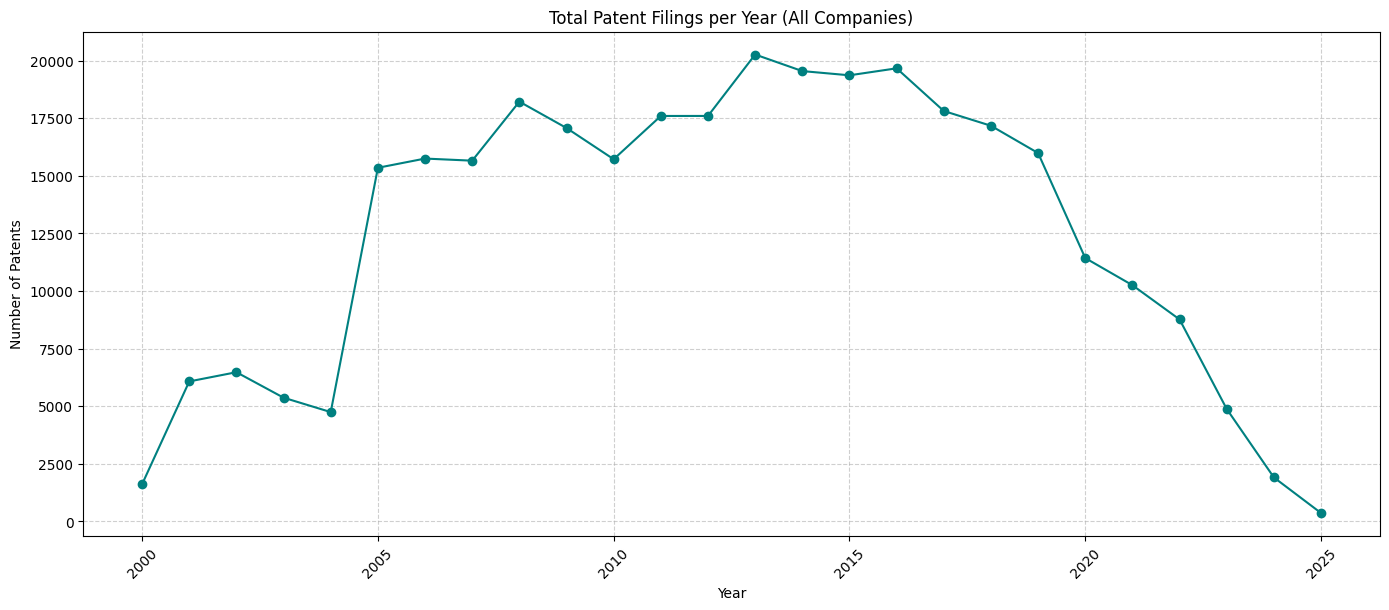

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually constructed DataFrame based on the table provided
data = {
    'Company': [
        "WALMART", "AMAZON", "STARBUCKS", "ORACLE", "GENERAL MOTORS GM",
        "WELLS FARGO", "Home Depot", "JP MORGAN", "Boeing", "MICROSOFT", "LOWE'S"
    ],
    2000:  [None, None, None, 1073, 531, None, 6, None, None, None, None],
    2001:  [None, None, None, 5401, 662, 1, 8, None, None, None, None],
    2002:  [None, None, None, 5485, 981, 0, 6, None, None, None, None],
    2003:  [None, None, None, 3960, 1398, 2, 6, None, None, None, None],
    2004:  [None, None, None, 3191, 1543, 3, 4, None, None, None, None],
    2005:  [9, 116, 11, 2934, 2415, 4, 2, None, 1435, 8420, None],
    2006:  [16, 189, 77, 2755, 3045, 8, 4, None, 1851, 7801, None],
    2007:  [23, 283, 32, 2345, 3694, 8, 0, None, 1869, 7400, None],
    2008:  [17, 443, 6, 2291, 5752, 2, 1, None, 1923, 7782, None],
    2009:  [51, 410, 13, 1991, 4807, 3, 15, None, 1388, 8394, None],
    2010:  [38, 514, 69, 1454, 5230, 8, 29, None, 1497, 6876, 2],
    2011:  [77, 981, 16, 1807, 5582, 11, 30, 84, 1868, 7139, None],
    2012:  [57, 1195, 57, 2294, 5023, 17, 27, 102, 2653, 6171, None],
    2013:  [219, 1994, 80, 2532, 4646, 43, 110, 150, 3544, 6944, None],
    2014:  [252, 2264, 31, 2464, 4023, 100, 104, 124, 4186, 5995, None],
    2015:  [273, 3275, 126, 2530, 3825, 230, 103, 95, 3574, 5329, None],
    2016:  [237, 3253, 110, 1939, 4278, 206, 102, 102, 3699, 5737, None],
    2017:  [794, 2993, 103, 2082, 5061, 213, 65, 167, 4421, 1910, 2],
    2018:  [1676, 3148, 57, 1601, 5273, 117, 60, 238, 4903, 97, None],
    2019:  [1383, 2968, 73, 1436, 4632, 35, 35, 326, 5097, None, None],
    2020:  [1201, 3015, 96, 839, 2745, 2, 32, 229, 3267, None, 1],
    2021:  [396, 2923, 18, 209, 3137, None, 16, 66, 3483, None, 1],
    2022:  [450, 2085, 89, None, 4094, None, None, None, 2044, None, None],
    2023:  [306, 1585, 164, None, 1360, None, None, None, 1460, None, None],
    2024:  [239, 782, 143, None, 1, None, None, None, 739, None, None],
    2025:  [16, 284, 57, None, None, None, None, None, 1, None, None]
}

# Create DataFrame
df = pd.DataFrame(data).set_index('Company')

# Sum patents across all companies per year
yearly_totals = df.sum(axis=0)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o', color='teal')
plt.title("Total Patent Filings per Year (All Companies)")
plt.xlabel("Year")
plt.ylabel("Number of Patents")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
